# **LAS MATEMÁTICAS EN EL DEPORTE: ANÁLISIS DE DATOS EN EL FÚTBOL**

Hola soy Mohamed El Amin Benlagraa y este es el código que he utilizado para realizar mi TFG, con el mismo nombre que el título.

# 0. Paquetes

In [ ]:
!pip install tabpfn
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from xgboost import XGBClassifier , XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, roc_auc_score, recall_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from tabpfn import TabPFNClassifier, TabPFNRegressor

from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectFromModel

from scipy.stats import randint, uniform

import shap


'\nfrom sklearn.ensemble import RandomForestRegressor, RandomForestClassifier\nfrom sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree\nfrom xgboost import XGBClassifier , XGBRegressor\nfrom lightgbm import LGBMRegressor\nfrom catboost import CatBoostRegressor\n\nfrom sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, roc_auc_score, recall_score\nfrom sklearn.experimental import enable_iterative_imputer\nfrom sklearn.impute import IterativeImputer\n\nfrom tabpfn import TabPFNClassifier, TabPFNRegressor\n\nfrom sklearn.neural_network import MLPRegressor\nfrom sklearn.feature_selection import SelectFromModel\n\nfrom scipy.stats import randint, uniform\n\nimport shap\n'

# 1. Importar los datos

In [ ]:
import pandas as pd

df = pd.read_csv('DatosLaLigaPremier1.csv', sep=';', on_bad_lines='skip', decimal=',')

In [ ]:
df

,Jugador,País,Posc,Equipo,Liga,Edad,PJ,PG,PE,PP,...,DesafiosDef,DesafExt%,DisBloq,Intercep,Despejes,onG,onGC,Dentro-Fuera,Dentro-Fuera_xG,DesafiosExt
0,Erling Haaland,NOR,DL,Manchester City,PremierLeague,23,31,28,7,3,...,3.0,66.7,1.0,2.0,16.0,65.0,25.0,-0.87,-0.02,2.001
1,Jude Bellingham,ENG,CC,Real Madrid,LaLiga,20,28,29,8,1,...,36.0,33.3,5.0,21.0,17.0,57.0,16.0,-0.04,0.09,11.988
2,Lamine Yamal,ESP,DL,Barcelona,LaLiga,16,37,26,7,5,...,48.0,37.5,0.0,19.0,11.0,57.0,33.0,0.17,-0.15,18.000
3,Bukayo Saka,ENG,DL,Arsenal,PremierLeague,21,35,28,5,5,...,59.0,44.1,2.0,15.0,24.0,78.0,27.0,-0.40,0.04,26.019
4,Phil Foden,ENG,DL,Manchester City,PremierLeague,23,35,28,7,3,...,31.0,41.9,0.0,13.0,18.0,75.0,27.0,-0.73,-0.18,12.989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,Radu Drcgucin,ROU,DF,Tottenham,PremierLeague,21,9,20,6,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,Saša Lukic,SRB,CC,Fulham,PremierLeague,26,24,13,8,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,Stefan Mitrovic,SRB,DF,Getafe,LaLiga,33,11,10,13,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,Stefan Savic,MNE,DF,Atlético Madrid,LaLiga,32,23,24,4,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Procesamiento de los datos

**Previamente a esto, al conjunto de datos ya le hemos quitado las observaciones que pueden ser menos importantes.
En este caso hemos quitado todos los jugadores que hayan jugado menos de 3 partidos ya que no tenemos información suficiente de su rendimiento.**

In [ ]:
# Definir nueva variable que representa mejor los desafios con exito de los defensas
df['DesafiosExt'] = (df['DesafiosDef']) * (0.01*df['DesafExt%'])

Tratar missing values (La mejor opción es MICE)

In [ ]:
# Crear el imputador MICE
imputer = IterativeImputer(random_state=0)

# Aplicarlo solo a las columnas numéricas
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
df[columnas_numericas] = imputer.fit_transform(df[columnas_numericas])

df

,Jugador,País,Posc,Equipo,Liga,Edad,PJ,PG,PE,PP,...,DesafiosDef,DesafExt%,DisBloq,Intercep,Despejes,onG,onGC,Dentro-Fuera,Dentro-Fuera_xG,DesafiosExt
0,Erling Haaland,NOR,DL,Manchester City,PremierLeague,23.0,31.0,28.0,7.0,3.0,...,3.000000,66.700000,1.000000,2.000000,16.000000,65.000000,25.000000,-0.870000,-0.020000,2.001000
1,Jude Bellingham,ENG,CC,Real Madrid,LaLiga,20.0,28.0,29.0,8.0,1.0,...,36.000000,33.300000,5.000000,21.000000,17.000000,57.000000,16.000000,-0.040000,0.090000,11.988000
2,Lamine Yamal,ESP,DL,Barcelona,LaLiga,16.0,37.0,26.0,7.0,5.0,...,48.000000,37.500000,0.000000,19.000000,11.000000,57.000000,33.000000,0.170000,-0.150000,18.000000
3,Bukayo Saka,ENG,DL,Arsenal,PremierLeague,21.0,35.0,28.0,5.0,5.0,...,59.000000,44.100000,2.000000,15.000000,24.000000,78.000000,27.000000,-0.400000,0.040000,26.019000
4,Phil Foden,ENG,DL,Manchester City,PremierLeague,23.0,35.0,28.0,7.0,3.0,...,31.000000,41.900000,0.000000,13.000000,18.000000,75.000000,27.000000,-0.730000,-0.180000,12.989000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,Radu Drcgucin,ROU,DF,Tottenham,PremierLeague,21.0,9.0,20.0,6.0,12.0,...,19.193706,52.426293,6.472934,9.379723,26.518486,16.485308,12.935470,-0.273232,-0.136029,11.405789
1001,Saša Lukic,SRB,CC,Fulham,PremierLeague,26.0,24.0,13.0,8.0,17.0,...,24.893505,46.442541,5.911682,11.906875,26.679808,17.797243,20.805915,-0.241176,-0.028428,12.208685
1002,Stefan Mitrovic,SRB,DF,Getafe,LaLiga,33.0,11.0,10.0,13.0,15.0,...,20.966431,51.494650,5.567832,11.547737,29.070713,9.343677,9.798047,-0.256255,-0.182065,11.995244
1003,Stefan Savic,MNE,DF,Atlético Madrid,LaLiga,32.0,23.0,24.0,4.0,10.0,...,23.005929,54.156054,5.766650,11.882632,33.522411,33.890037,19.951996,-0.133687,-0.033597,12.773635


# Mostrar valores atípicos

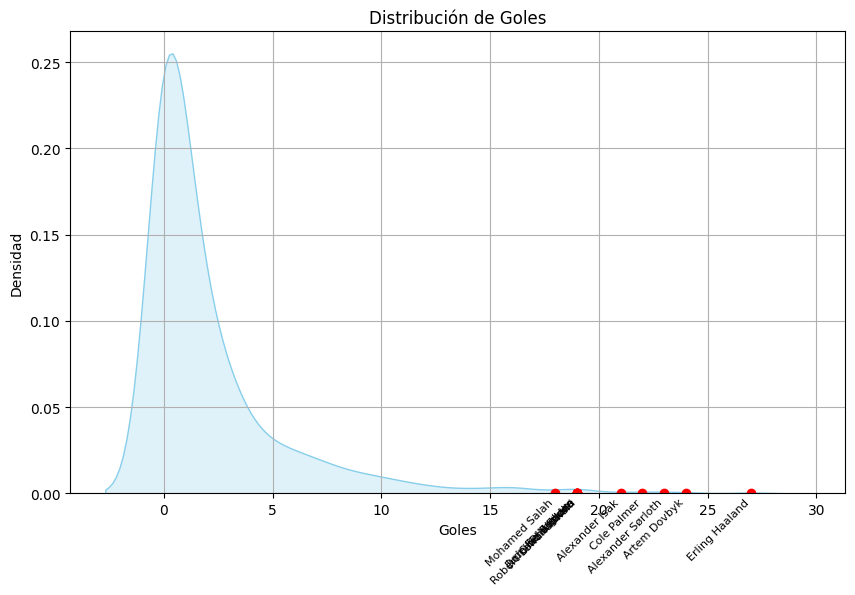

Outliers detectados:
                Jugador   Gls
0        Erling Haaland  27.0
1       Jude Bellingham  19.0
4            Phil Foden  19.0
6           Cole Palmer  22.0
21       Alexander Isak  21.0
45        Mohamed Salah  18.0
53        Ollie Watkins  19.0
75      Dominic Solanke  19.0
122   Alexander Sørloth  23.0
156  Robert Lewandowski  19.0
331        Artem Dovbyk  24.0


In [ ]:
# Asegurarnos de que la variable de goles sea numérica
df['Gls'] = pd.to_numeric(df['Gls'])

plt.figure(figsize=(10, 6))
sns.kdeplot(df['Gls'], fill=True, color="skyblue")
plt.title('Distribución de Goles')
plt.xlabel('Goles')
plt.ylabel('Densidad')
plt.grid(True)


# Detectar outliers extremos (usamos percentiles)
# Calcular el percentil 0.99
percentil_99 = df['Gls'].quantile(0.99)

# Filtrar los jugadores outliers
outliers = df[df['Gls'] >= percentil_99]

# Ahora añadir los outliers como puntos y nombres
for i, row in outliers.iterrows():
    plt.scatter(row['Gls'], 0, color='red')  # Poner el punto en la línea de x
    plt.text(row['Gls'], -0.002, row['Jugador'], rotation=45, ha='right', va='top', fontsize=8)

plt.show()


# Mostrar algunos outliers
print("Outliers detectados:")
print(outliers[['Jugador', 'Gls']])

Detectar los jugadores que influyen negativamente en el rendimiento de los del equipo

Número de jugadores del Villarreal: 28
Primeras filas de JugadoresVilla:
                Jugador  Dentro-Fuera
122  Alexander Sørloth          1.33
149     Ilias Akhomach         -0.75
173        Raúl Albiol         -0.22
186     Adrià Altimira         -1.65
227         Alex Baena          0.71
Número de jugadores tras manejar nulos: 28
Valores nulos en JugadoresVilla:
 Jugador         0
Dentro-Fuera    0
dtype: int64

7 peores jugadores (menor Dentro-Fuera):
          Jugador  Dentro-Fuera
     Denis Suárez         -2.82
  Filip Jørgensen         -2.11
    Carlos Romero         -1.86
   Adrià Altimira         -1.65
José Luis Morales         -1.24
  Alfonso Pedraza         -1.20
     Jorge Cuenca         -1.18


/tmp/ipython-input-24-1607827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JugadoresVilla['Dentro-Fuera'] = pd.to_numeric(JugadoresVilla['Dentro-Fuera'], errors='coerce')
/tmp/ipython-input-24-1607827.py:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


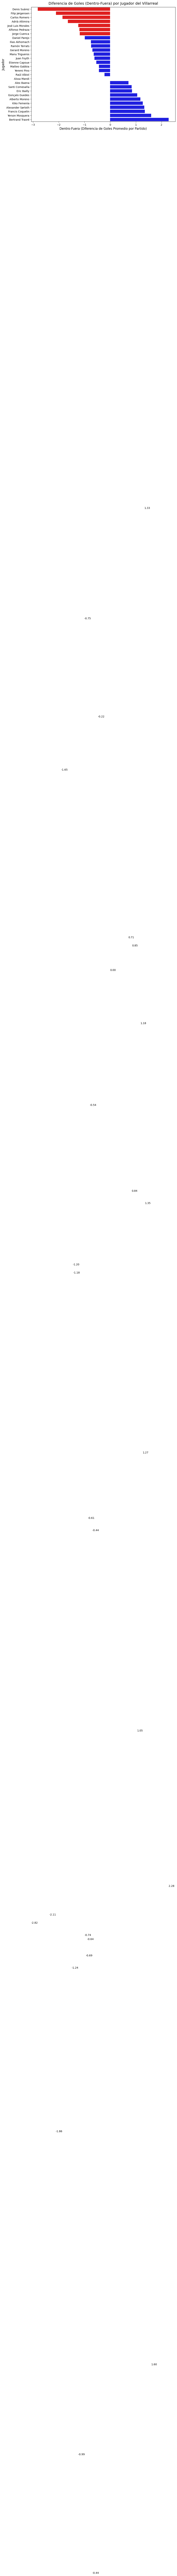

In [ ]:
# Filtrar jugadores del Villarreal
JugadoresVilla = df[df['Equipo'] == 'Villarreal']
print("Número de jugadores del Villarreal:", len(JugadoresVilla))
print("Primeras filas de JugadoresVilla:\n", JugadoresVilla[['Jugador', 'Dentro-Fuera']].head())

JugadoresVilla['Dentro-Fuera'] = pd.to_numeric(JugadoresVilla['Dentro-Fuera'], errors='coerce')
print("Número de jugadores tras manejar nulos:", len(JugadoresVilla))
print("Valores nulos en JugadoresVilla:\n", JugadoresVilla[['Jugador', 'Dentro-Fuera']].isna().sum())

# Verificar si hay datos para graficar
if len(JugadoresVilla) == 0:
    print("Error: No hay jugadores del Villarreal con datos válidos para graficar.")
else:
    # Ordenar por 'Dentro-Fuera' (ascendente para que los peores estén arriba)
    JugadoresVilla = JugadoresVilla.sort_values('Dentro-Fuera', ascending=True)

    # Identificar los 7 peores (o todos si hay menos de 7)
    n_peores = min(7, len(JugadoresVilla))
    peores_jugadores = JugadoresVilla.head(n_peores)[['Jugador', 'Dentro-Fuera']].copy()

    # Imprimir los 7 peores jugadores con sus valores de Dentro-Fuera
    print("\n7 peores jugadores (menor Dentro-Fuera):")
    print(peores_jugadores.to_string(index=False))

    # Crear columna para colores
    JugadoresVilla['Color'] = JugadoresVilla['Jugador'].apply(lambda x: 'red' if x in peores_jugadores['Jugador'].tolist() else 'blue')

    # Crear gráfica de barras horizontal
    plt.figure(figsize=(10, 8))
    sns.barplot(data=JugadoresVilla, y='Jugador', x='Dentro-Fuera', hue='Color', palette={'red': 'red', 'blue': 'blue'}, dodge=False)

    # Configurar la gráfica
    plt.title('Diferencia de Goles (Dentro-Fuera) por Jugador del Villarreal', fontsize=14, pad=10)
    plt.xlabel('Dentro-Fuera (Diferencia de Goles Promedio por Partido)', fontsize=12)
    plt.ylabel('Jugador', fontsize=12)

    # Añadir los valores de 'Dentro-Fuera' en las barras
    for i, row in JugadoresVilla.iterrows():
        plt.text(row['Dentro-Fuera'], i, f"{row['Dentro-Fuera']:.2f}",
                 va='center', ha='left' if row['Dentro-Fuera'] >= 0 else 'right',
                 fontsize=10, color='black')

    # Eliminar la leyenda de 'Color'
    plt.legend([], [], frameon=False)

    # Ajustar diseño y mostrar gráfica
    plt.tight_layout()
    plt.show()

# 3. Crear variables target

**Rendimiento ofensivo: Rend_ofensivo**

In [ ]:
# Calcular el percentil 0.9
percentil_9 = df['Valor Mercado (millones de e)'].quantile(0.9)


# Filtrar los jugadores outliers
outliers = df[df['Valor Mercado (millones de e)'] >= percentil_9]
outliersDL = outliers[(df['Posc'] == 'DL') | (df['Posc'] == 'CC')]
outliersDF = outliers[(df['Posc'] == 'DF')| (df['Posc'] == 'CC')]

/tmp/ipython-input-25-2440815245.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliersDL = outliers[(df['Posc'] == 'DL') | (df['Posc'] == 'CC')]
/tmp/ipython-input-25-2440815245.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliersDF = outliers[(df['Posc'] == 'DF')| (df['Posc'] == 'CC')]


In [ ]:
outliersDF

,Jugador,País,Posc,Equipo,Liga,Edad,PJ,PG,PE,PP,...,DesafiosDef,DesafExt%,DisBloq,Intercep,Despejes,onG,onGC,Dentro-Fuera,Dentro-Fuera_xG,DesafiosExt
1,Jude Bellingham,ENG,CC,Real Madrid,LaLiga,20.0,28.0,29.0,8.0,1.0,...,36.00000,33.300000,5.000000,21.000000,17.000000,57.000000,16.000000,-0.040000,0.090000,11.988000
5,Federico Valverde,URU,CC,Real Madrid,LaLiga,25.0,37.0,29.0,8.0,1.0,...,42.00000,57.100000,2.000000,43.000000,40.000000,76.000000,22.000000,0.450000,0.300000,23.982000
7,Rodri,ESP,CC,Manchester City,PremierLeague,27.0,34.0,28.0,7.0,3.0,...,21.00000,38.100000,0.000000,8.000000,2.000000,10.000000,13.000000,-0.480000,-0.390000,8.001000
8,Declan Rice,ENG,CC,Arsenal,PremierLeague,24.0,38.0,28.0,5.0,5.0,...,57.00000,56.100000,11.000000,44.000000,52.000000,84.000000,28.000000,-1.210000,-0.180000,31.977000
9,Martin Ødegaard,NOR,CC,Arsenal,PremierLeague,24.0,35.0,28.0,5.0,5.0,...,58.00000,29.300000,1.000000,15.000000,5.000000,81.000000,23.000000,0.590000,0.040000,16.994000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,Julián Álvarez,ARG,CC,Manchester City,PremierLeague,23.0,36.0,28.0,7.0,3.0,...,32.00000,25.000000,0.000000,2.000000,14.000000,76.000000,24.000000,0.600000,0.110000,8.000000
724,Nathan Aké,NED,DF,Manchester City,PremierLeague,28.0,29.0,28.0,7.0,3.0,...,20.00000,65.000000,2.000000,14.000000,54.000000,55.000000,20.000000,-0.220000,-0.510000,13.000000
829,Joško Gvardiol,CRO,DF,Manchester City,PremierLeague,21.0,28.0,28.0,7.0,3.0,...,38.00000,55.300000,12.000000,27.000000,37.000000,68.000000,23.000000,0.340000,0.250000,21.014000
886,Reece James,ENG,DF,Chelsea,PremierLeague,23.0,10.0,18.0,9.0,11.0,...,10.00000,80.000000,4.000000,3.000000,7.000000,8.000000,11.000000,-1.150000,-0.870000,8.000000


In [ ]:
# Ver los coeficientes de la nueva variable. Y para ello vamos usar regresión lineal

# Probamos unas cuantas y no quedamos con estas
explicativ = outliersDL[['Gls','Ass','Pases.Peligrosos','G/T','RegatesExt']]
# Escalar las variables es muy importante para RL
scaler = StandardScaler()
explicativa = scaler.fit_transform(explicativ)

lr = LinearRegression()
lr.fit(explicativa, outliersDL['Valor Mercado (millones de e)'])

LinearRegression()

In [ ]:
lr.coef_

# Normalización
coeficientes = np.round(lr.coef_ / np.sum(np.abs(lr.coef_)),2)
coeficientes

# Dado que RL no capta bien las relaciones no lineales, nos salen cosas como que las asisitencias tienen un bheta negativo algo que no tiene sentido.

array([ 0.44, -0.13,  0.4 , -0.01,  0.02])

In [ ]:
# Random forest sí que capta bien estas realiones no lineles

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(explicativ, outliersDL['Valor Mercado (millones de e)'])
rf.feature_importances_

array([0.35993607, 0.09815993, 0.27772344, 0.12467111, 0.13950945])

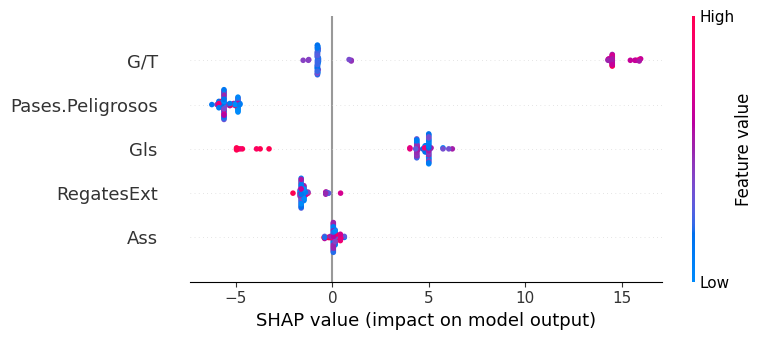

In [ ]:
explainer = shap.Explainer(rf)
shap_values = explainer.shap_values(explicativa)

shap.summary_plot(
    shap_values  = shap_values,
    features = explicativa,
    feature_names= ['Gls','Ass','Pases.Peligrosos','G/T','RegatesExt']
)

# Con el SHAP vemos que todas las variables esta positivamente correlacionadas con SHAP, la única que está dudosa es Ass

In [ ]:
# Nueva target:

df['Rend_Ofensivo'] = 0.43*df['Gls'] + 0.1*df['Ass'] + 0.29*df['Pases.Peligrosos'] + 0.08*df['G/T'] + 0.1*df['RegatesExt']


df

# Haaland con un valor no muy alto debido a que estamos mirando otras métricas a parte de solo goles marcados, si no el sería el mejor jugador del mundo.

,Jugador,País,Posc,Equipo,Liga,Edad,PJ,PG,PE,PP,...,DesafExt%,DisBloq,Intercep,Despejes,onG,onGC,Dentro-Fuera,Dentro-Fuera_xG,DesafiosExt,Rend_Ofensivo
0,Erling Haaland,NOR,DL,Manchester City,PremierLeague,23.0,31.0,28.0,7.0,3.0,...,66.700000,1.000000,2.000000,16.000000,65.000000,25.000000,-0.870000,-0.020000,2.001000,20.864400
1,Jude Bellingham,ENG,CC,Real Madrid,LaLiga,20.0,28.0,29.0,8.0,1.0,...,33.300000,5.000000,21.000000,17.000000,57.000000,16.000000,-0.040000,0.090000,11.988000,70.633200
2,Lamine Yamal,ESP,DL,Barcelona,LaLiga,16.0,37.0,26.0,7.0,5.0,...,37.500000,0.000000,19.000000,11.000000,57.000000,33.000000,0.170000,-0.150000,18.000000,32.857200
3,Bukayo Saka,ENG,DL,Arsenal,PremierLeague,21.0,35.0,28.0,5.0,5.0,...,44.100000,2.000000,15.000000,24.000000,78.000000,27.000000,-0.400000,0.040000,26.019000,49.228000
4,Phil Foden,ENG,DL,Manchester City,PremierLeague,23.0,35.0,28.0,7.0,3.0,...,41.900000,0.000000,13.000000,18.000000,75.000000,27.000000,-0.730000,-0.180000,12.989000,62.404400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,Radu Drcgucin,ROU,DF,Tottenham,PremierLeague,21.0,9.0,20.0,6.0,12.0,...,52.426293,6.472934,9.379723,26.518486,16.485308,12.935470,-0.273232,-0.136029,11.405789,3.418919
1001,Saša Lukic,SRB,CC,Fulham,PremierLeague,26.0,24.0,13.0,8.0,17.0,...,46.442541,5.911682,11.906875,26.679808,17.797243,20.805915,-0.241176,-0.028428,12.208685,14.057638
1002,Stefan Mitrovic,SRB,DF,Getafe,LaLiga,33.0,11.0,10.0,13.0,15.0,...,51.494650,5.567832,11.547737,29.070713,9.343677,9.798047,-0.256255,-0.182065,11.995244,6.220000
1003,Stefan Savic,MNE,DF,Atlético Madrid,LaLiga,32.0,23.0,24.0,4.0,10.0,...,54.156054,5.766650,11.882632,33.522411,33.890037,19.951996,-0.133687,-0.033597,12.773635,19.940000


**Rendimiento ofensivo: Rend_Defensivo**

/tmp/ipython-input-32-317034045.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliersDF1 = outliers[(df['Posc'] == 'DF')]
/tmp/ipython-input-32-317034045.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  normalesDF1 = normales[(df['Posc'] == 'DF')]


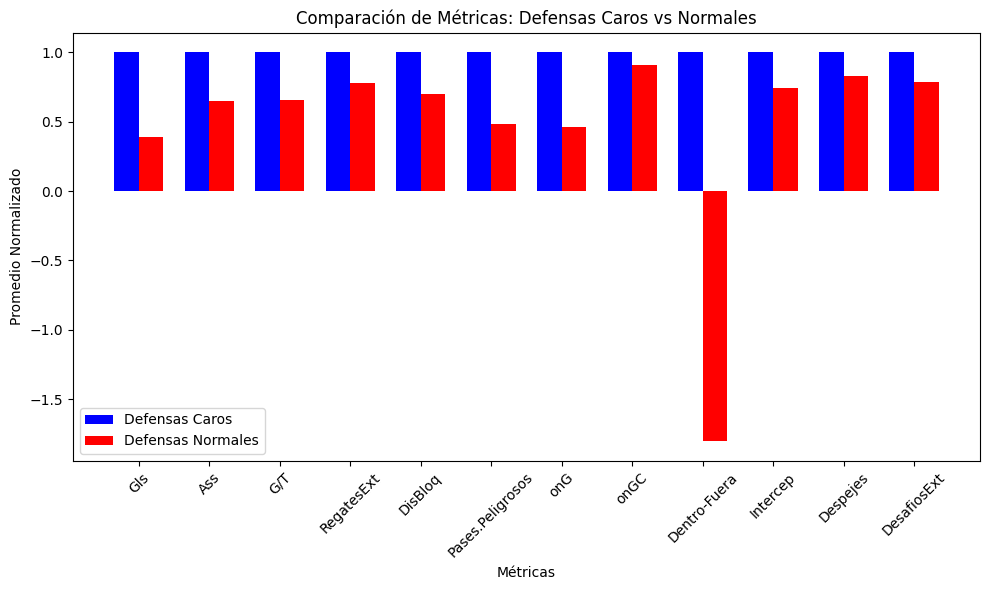

In [ ]:
metricas = ['Gls','Ass','G/T','RegatesExt','DisBloq','Pases.Peligrosos','onG','onGC','Dentro-Fuera','Intercep','Despejes','DesafiosExt']

normales = df[df['Valor Mercado (millones de e)'] < percentil_9]
outliersDF1 = outliers[(df['Posc'] == 'DF')]
normalesDF1 = normales[(df['Posc'] == 'DF')]

# Calcular promedios para cada grupo
promedios_caros = outliersDF1[metricas].mean()
promedios_baratos = normalesDF1[metricas].mean()

# Normalizar los promedios para comparar (escalado entre 0 y 1 respecto al máximo entre ambos grupos)
max_values = np.maximum(promedios_caros, promedios_baratos)
promedios_caros_norm = promedios_caros / max_values
promedios_baratos_norm = promedios_baratos / max_values

# Crear gráfica de barras
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metricas))
width = 0.35

# Barras para caros y baratos
ax.bar(x - width/2, promedios_caros_norm, width, label='Defensas Caros', color='blue')
ax.bar(x + width/2, promedios_baratos_norm, width, label='Defensas Normales', color='red')

# Configurar gráfica
ax.set_xlabel('Métricas')
ax.set_ylabel('Promedio Normalizado')
ax.set_title('Comparación de Métricas: Defensas Caros vs Normales')
ax.set_xticks(x)
ax.set_xticklabels(metricas, rotation=45)
ax.legend()

# Mostrar gráfica
plt.tight_layout()
plt.show()

# Las métricas donde hay más diferencia son y que no sean de caracter puramente ofensivo:

metricas = ['DisBloq','Pases.Peligrosos','Dentro-Fuera','Intercep','DesafiosExt']


In [ ]:
# Probamos unas cuantas y no quedamos con estas
explicativ1 = outliersDF[['DisBloq','Pases.Peligrosos','Dentro-Fuera','Intercep','DesafiosExt']]

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(explicativ1, outliersDF['Valor Mercado (millones de e)'])
rf.feature_importances_

np.round(rf.feature_importances_,2)


array([0.11, 0.45, 0.09, 0.12, 0.23])

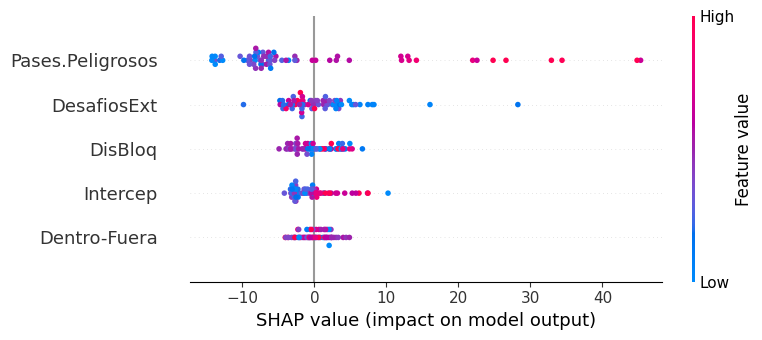

In [ ]:
explainer1 = shap.Explainer(rf)
shap_values1 = explainer1.shap_values(explicativ1)

shap.summary_plot(
    shap_values  = shap_values1,
    features = explicativ1,
    feature_names= ['DisBloq','Pases.Peligrosos','Dentro-Fuera','Intercep','DesafiosExt']
)

# Tenemos dos que están relacionadas positivamente con el SHAP y las otras 3 está dudosas, pero hemos visto a partir del gráfico anterior que los mejores
# defenasas destacaban más en estas métricas.

In [ ]:
# Nueva target:

df['Rend_Defensivo'] = 0.1*df['DisBloq'] + 0.15*df['Pases.Peligrosos'] + 0.1*df['Dentro-Fuera'] + 0.22*df['Intercep'] + 0.43*df['DesafiosExt']


df


,Jugador,País,Posc,Equipo,Liga,Edad,PJ,PG,PE,PP,...,DisBloq,Intercep,Despejes,onG,onGC,Dentro-Fuera,Dentro-Fuera_xG,DesafiosExt,Rend_Ofensivo,Rend_Defensivo
0,Erling Haaland,NOR,DL,Manchester City,PremierLeague,23.0,31.0,28.0,7.0,3.0,...,1.000000,2.000000,16.000000,65.000000,25.000000,-0.870000,-0.020000,2.001000,20.864400,5.213430
1,Jude Bellingham,ENG,CC,Real Madrid,LaLiga,20.0,28.0,29.0,8.0,1.0,...,5.000000,21.000000,17.000000,57.000000,16.000000,-0.040000,0.090000,11.988000,70.633200,39.670840
2,Lamine Yamal,ESP,DL,Barcelona,LaLiga,16.0,37.0,26.0,7.0,5.0,...,0.000000,19.000000,11.000000,57.000000,33.000000,0.170000,-0.150000,18.000000,32.857200,23.937000
3,Bukayo Saka,ENG,DL,Arsenal,PremierLeague,21.0,35.0,28.0,5.0,5.0,...,2.000000,15.000000,24.000000,78.000000,27.000000,-0.400000,0.040000,26.019000,49.228000,33.548170
4,Phil Foden,ENG,DL,Manchester City,PremierLeague,23.0,35.0,28.0,7.0,3.0,...,0.000000,13.000000,18.000000,75.000000,27.000000,-0.730000,-0.180000,12.989000,62.404400,33.572270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,Radu Drcgucin,ROU,DF,Tottenham,PremierLeague,21.0,9.0,20.0,6.0,12.0,...,6.472934,9.379723,26.518486,16.485308,12.935470,-0.273232,-0.136029,11.405789,3.418919,8.787999
1001,Saša Lukic,SRB,CC,Fulham,PremierLeague,26.0,24.0,13.0,8.0,17.0,...,5.911682,11.906875,26.679808,17.797243,20.805915,-0.241176,-0.028428,12.208685,14.057638,14.886298
1002,Stefan Mitrovic,SRB,DF,Getafe,LaLiga,33.0,11.0,10.0,13.0,15.0,...,5.567832,11.547737,29.070713,9.343677,9.798047,-0.256255,-0.182065,11.995244,6.220000,11.079614
1003,Stefan Savic,MNE,DF,Atlético Madrid,LaLiga,32.0,23.0,24.0,4.0,10.0,...,5.766650,11.882632,33.522411,33.890037,19.951996,-0.133687,-0.033597,12.773635,19.940000,18.570138


# 4. Definir variables explicativas y train, test

In [ ]:
variab1 = ['Edad', 'Gls', 'Ass', 'Mín']  # Puedes elegir otras si quieres
variab2 = ['Edad', 'Ass', 'Mín', 'Pts']  # Ajusta según las columnas de tu dataset
variab3 = [col for col in df.columns if col not in ['Jugador', 'Equipo','País','Posc','Liga', 'Liga_binaria', 'Probabilidad_Premier']]
variab4 = [col for col in df.columns if col not in ['Jugador', 'Equipo','País','Posc','Liga','Gls']]


# Sin las categóricas y si las que se han usado para crear Rend_Ofensivo
variab5 = [col for col in df.columns if col not in ['Jugador', 'Equipo','País','Posc','Liga','Gls','Ass','Pases.Peligrosos','G/T','RegatesExt', 'Valor Mercado (millones de e)', 'Rend_Ofensivo', 'Rend_Defensivo']]

# Sin las categóricas y si las que se han usado para crear Rend_Defensivo
variab6 = [col for col in df.columns if col not in ['Jugador', 'Equipo','País','Posc','Liga','DisBloq','Pases.Peligrosos','Dentro-Fuera','Intercep','DesafiosExt','Valor Mercado (millones de e)', 'Rend_Ofensivo', 'Rend_Defensivo']]

variab7 = [col for col in df.columns if col not in ['Jugador', 'Equipo','País','Posc','Liga','DisBloq','Pases.Peligrosos','Dentro-Fuera','Intercep','DesafiosExt','Valor Mercado (millones de e)','Gls','Ass','G/T','RegatesExt']]

variab8 = ['xG','xAG','Avances']

variab9 = [col for col in df.columns if col not in ['Valor Mercado (millones de e)','Jugador','DesafiosDef', 'Equipo','País','Posc','Liga','Gls','Ass','Pases.Peligrosos','G/T','RegatesExt','DisBloq','Pases.Peligrosos','Dentro-Fuera','Intercep','DesafiosExt','Valor Mercado (millones de e)','Rend_Ofensivo','Rend_Defensivo']]


Conjunto de entrenamiento

In [ ]:
trainDL = df[(df['Posc'] != 'PO') & (df['Posc'] != 'DL')]
len(trainDL)
trainDF = df[(df['Posc'] != 'PO') & (df['Posc'] != 'DF')]
len(trainDF)

571

In [ ]:
testDL = df[df['Posc'] == 'DL']
len(testDL)
testDF = df[df['Posc'] == 'DF']
len(testDF)

365

# 5. Predecir las nuevas variables target


# **Jugadores ofensivos**

In [ ]:
#vars_explicativas = ['DisBloq', 'Pases.Peligrosos', 'Dentro-Fuera', 'Intercep', 'DesafiosExt']
vars_explicativas = variab5

trainDL[vars_explicativas][(df['Rend_Ofensivo'] > 1)]

/tmp/ipython-input-42-574171230.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trainDL[vars_explicativas][(df['Rend_Ofensivo'] > 1)]


,Edad,PJ,PG,PE,PP,Puntosjugador,Pts,Titular,Suplente,Mín,...,DesafiosDef,DesafExt%,DisBloq,Intercep,Despejes,onG,onGC,Dentro-Fuera,Dentro-Fuera_xG,DesafiosExt
1,20.0,28.0,29.0,8.0,1.0,2.460000,95.0,27.0,1.000000,2315.0,...,36.000000,33.300000,5.000000,21.000000,17.000000,57.000000,16.000000,-0.040000,0.090000,11.988000
5,25.0,37.0,29.0,8.0,1.0,2.490000,95.0,33.0,4.000000,2904.0,...,42.000000,57.100000,2.000000,43.000000,40.000000,76.000000,22.000000,0.450000,0.300000,23.982000
7,27.0,34.0,28.0,7.0,3.0,1.450000,91.0,34.0,20.000000,2931.0,...,21.000000,38.100000,0.000000,8.000000,2.000000,10.000000,13.000000,-0.480000,-0.390000,8.001000
8,24.0,38.0,28.0,5.0,5.0,2.340000,89.0,37.0,1.000000,3225.0,...,57.000000,56.100000,11.000000,44.000000,52.000000,84.000000,28.000000,-1.210000,-0.180000,31.977000
9,24.0,35.0,28.0,5.0,5.0,2.370000,89.0,35.0,0.000000,3091.0,...,58.000000,29.300000,1.000000,15.000000,5.000000,81.000000,23.000000,0.590000,0.040000,16.994000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,21.0,9.0,20.0,6.0,12.0,1.739984,66.0,4.0,4.727038,429.0,...,19.193706,52.426293,6.472934,9.379723,26.518486,16.485308,12.935470,-0.273232,-0.136029,11.405789
1001,26.0,24.0,13.0,8.0,17.0,1.226186,47.0,13.0,10.827266,1122.0,...,24.893505,46.442541,5.911682,11.906875,26.679808,17.797243,20.805915,-0.241176,-0.028428,12.208685
1002,33.0,11.0,10.0,13.0,15.0,1.149336,43.0,9.0,2.193177,699.0,...,20.966431,51.494650,5.567832,11.547737,29.070713,9.343677,9.798047,-0.256255,-0.182065,11.995244
1003,32.0,23.0,24.0,4.0,10.0,1.980884,76.0,19.0,4.463376,1630.0,...,23.005929,54.156054,5.766650,11.882632,33.522411,33.890037,19.951996,-0.133687,-0.033597,12.773635


/tmp/ipython-input-43-4084418064.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = trainDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
/tmp/ipython-input-43-4084418064.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_final = testDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]


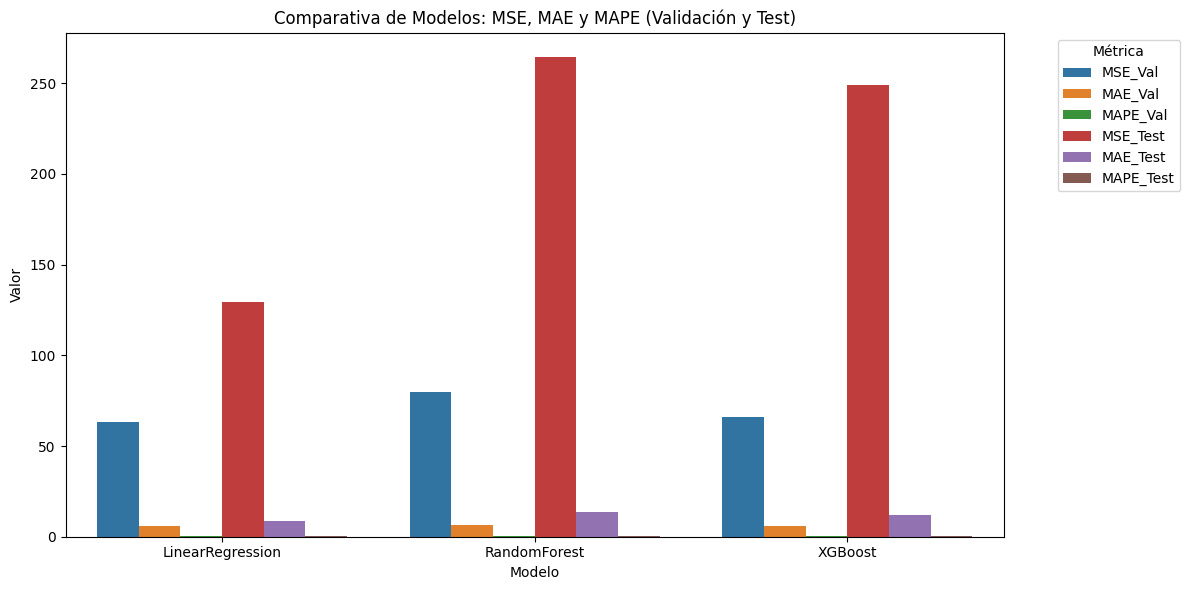


Resultados detallados:
             Modelo    MSE_Val   MAE_Val  MAPE_Val    MSE_Test   MAE_Test  \
0  LinearRegression  63.222424  5.946391  0.223914  129.505115   8.642325   
1      RandomForest  79.853432  6.342326  0.241726  264.604400  13.383576   
2           XGBoost  66.159923  5.659428  0.217219  249.060559  12.242690   

   MAPE_Test  
0   0.409217  
1   0.645066  
2   0.574200  


In [ ]:
# Los hiperparámetros han sido obtenidos por RandomSearch

X = trainDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
y = trainDL['Rend_Ofensivo'][(df['Rend_Ofensivo'] > 10)]


# Luego, dividir entrenamiento (80%) y validación (10%) del 90% restante
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1111, random_state=42)

# Usar testDL como conjunto de prueba final
X_test_final = testDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
y_test_final = testDL['Rend_Ofensivo'][(df['Rend_Ofensivo'] > 10)]

# Definir función para evaluar modelos (regresión)
def evaluar_modelo(nombre, modelo, X_train, y_train, X_val, y_val, X_test, y_test):
    modelo.fit(X_train, y_train)

    # Predicciones en validación
    y_pred_val = modelo.predict(X_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    mae_val = mean_absolute_error(y_val, y_pred_val)
    mape_val = mean_absolute_percentage_error(y_val, y_pred_val)
    #r2_val = r2_score(y_val, y_pred_val)

    # Predicciones en prueba
    y_pred_test = modelo.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
    #r2_test = r2_score(y_test, y_pred_test)

    return {
        "Modelo": nombre,
        "MSE_Val": mse_val,
        "MAE_Val": mae_val,
        "MAPE_Val": mape_val,
        #"R2_Val": r2_val,
        "MSE_Test": mse_test,
        "MAE_Test": mae_test,
        "MAPE_Test": mape_test,
        #"R2_Test": r2_test,
    }

# Entrenar y evaluar los modelos
resultados = []

# Regresión lineal
modelo1_1 = LinearRegression()
resultados.append(evaluar_modelo("LinearRegression", modelo1_1, X_train, y_train, X_val, y_val, X_test_final, y_test_final))

# Random Forest
modelo2_1 = RandomForestRegressor(n_estimators=100, random_state=42)
resultados.append(evaluar_modelo("RandomForest", modelo2_1, X_train, y_train, X_val, y_val, X_test_final, y_test_final))


# XGBoost
modelo3_1 = XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8, random_state=42)
resultados.append(evaluar_modelo("XGBoost", modelo3_1, X_train, y_train, X_val, y_val, X_test_final, y_test_final))


# Crear DataFrame con resultados
resultados_DL = pd.DataFrame(resultados)

# Visualización comparativa
resultados_melted = resultados_DL.melt(id_vars="Modelo", value_vars=["MSE_Val", "MAE_Val", "MAPE_Val", "MSE_Test", "MAE_Test", "MAPE_Test"],
                                       var_name="Métrica", value_name="Valor")

plt.figure(figsize=(12, 6))
sns.barplot(data=resultados_melted, x="Modelo", y="Valor", hue="Métrica")
plt.title("Comparativa de Modelos: MSE, MAE y MAPE (Validación y Test)")
plt.xlabel("Modelo")
plt.ylabel("Valor")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Mostrar resultados numéricos
print("\nResultados detallados:")
print(resultados_DL)

0:	learn: 16.3020684	total: 47.4ms	remaining: 9.42s
1:	learn: 15.9360257	total: 48.6ms	remaining: 4.81s
2:	learn: 15.5943379	total: 49.8ms	remaining: 3.27s
3:	learn: 15.2761414	total: 50.8ms	remaining: 2.49s
4:	learn: 14.9324728	total: 51.8ms	remaining: 2.02s
5:	learn: 14.6423823	total: 52.8ms	remaining: 1.71s
6:	learn: 14.3370808	total: 53.8ms	remaining: 1.48s
7:	learn: 14.0849314	total: 54.8ms	remaining: 1.31s
8:	learn: 13.8531167	total: 55.8ms	remaining: 1.18s
9:	learn: 13.6225210	total: 56.7ms	remaining: 1.08s
10:	learn: 13.3976825	total: 57.7ms	remaining: 991ms
11:	learn: 13.1233442	total: 58.7ms	remaining: 919ms
12:	learn: 12.8875241	total: 59.7ms	remaining: 858ms
13:	learn: 12.6475778	total: 60.7ms	remaining: 806ms
14:	learn: 12.4527797	total: 61.6ms	remaining: 760ms
15:	learn: 12.2424010	total: 62.6ms	remaining: 720ms
16:	learn: 12.0613553	total: 63.6ms	remaining: 685ms
17:	learn: 11.8740803	total: 64.6ms	remaining: 653ms
18:	learn: 11.7099229	total: 65.6ms	remaining: 625ms
19:

/tmp/ipython-input-44-3179689124.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = trainDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
/tmp/ipython-input-44-3179689124.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_final = testDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]


113:	learn: 7.0021571	total: 158ms	remaining: 119ms
114:	learn: 6.9742118	total: 160ms	remaining: 118ms
115:	learn: 6.9665721	total: 161ms	remaining: 116ms
116:	learn: 6.9563175	total: 162ms	remaining: 115ms
117:	learn: 6.9388941	total: 163ms	remaining: 113ms
118:	learn: 6.9174101	total: 164ms	remaining: 111ms
119:	learn: 6.9032098	total: 165ms	remaining: 110ms
120:	learn: 6.8823437	total: 166ms	remaining: 108ms
121:	learn: 6.8730247	total: 167ms	remaining: 106ms
122:	learn: 6.8605178	total: 168ms	remaining: 105ms
123:	learn: 6.8318592	total: 168ms	remaining: 103ms
124:	learn: 6.8170239	total: 169ms	remaining: 102ms
125:	learn: 6.7976545	total: 170ms	remaining: 100ms
126:	learn: 6.7896740	total: 172ms	remaining: 98.7ms
127:	learn: 6.7804240	total: 175ms	remaining: 98.3ms
128:	learn: 6.7721969	total: 176ms	remaining: 96.7ms
129:	learn: 6.7509894	total: 177ms	remaining: 95.1ms
130:	learn: 6.7299566	total: 178ms	remaining: 93.6ms
131:	learn: 6.7164444	total: 179ms	remaining: 92ms
132:	lea

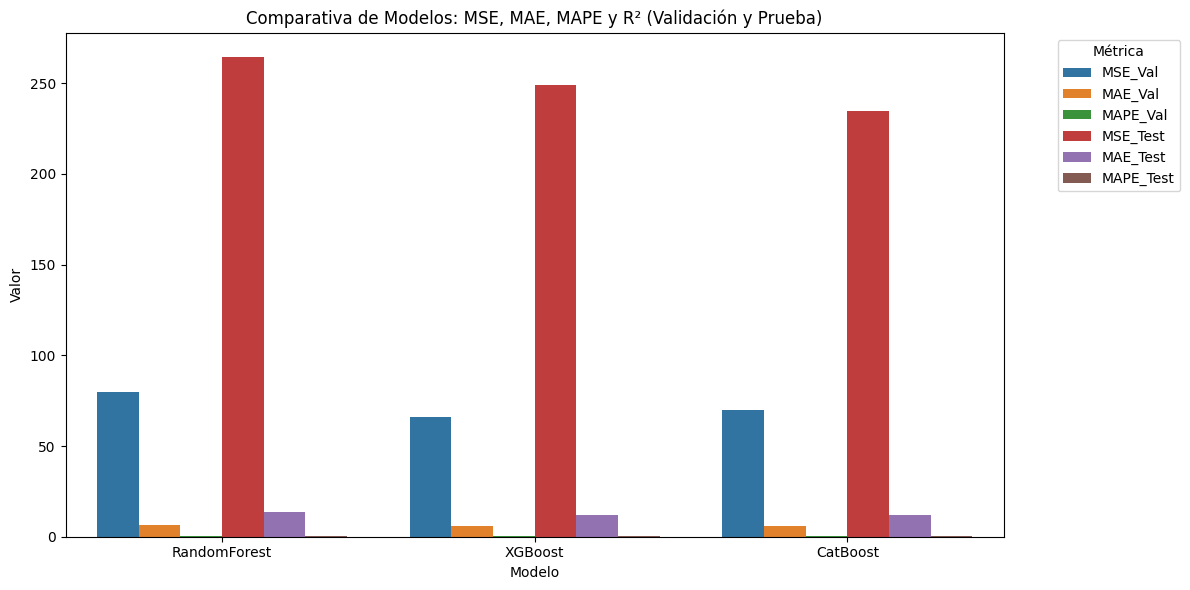


Resultados detallados:
         Modelo    MSE_Val   MAE_Val  MAPE_Val    MSE_Test   MAE_Test  \
0  RandomForest  79.853432  6.342326  0.241726  264.604400  13.383576   
1       XGBoost  66.159923  5.659428  0.217219  249.060559  12.242690   
2      CatBoost  69.845215  5.891851  0.217980  234.574969  12.145381   

   MAPE_Test  
0   0.645066  
1   0.574200  
2   0.581109  


In [ ]:
# CatBoost
# Usar var categóricas
vars_explicativas = [col for col in df.columns if col not in ['Jugador','País','Gls','Ass','Pases.Peligrosos','G/T','RegatesExt', 'Valor Mercado (millones de e)','Rend_Ofensivo', 'Rend_Defensivo']]


X = trainDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
y = trainDL['Rend_Ofensivo'][(df['Rend_Ofensivo'] > 10)]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1111, random_state=42)

X_test_final = testDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
y_test_final = testDL['Rend_Ofensivo'][(df['Rend_Ofensivo'] > 10)]

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1]
}

cat_features = ['Equipo','Posc','Liga']


modelo4_1 = CatBoostRegressor(cat_features=cat_features, learning_rate=0.05,max_depth=3,n_estimators=200,subsample=0.8,random_state=4)
resultados.append(evaluar_modelo("CatBoost", modelo4_1, X_train, y_train, X_val, y_val, X_test_final, y_test_final))

resultados = resultados[-3:]  # mantiene solo los últimos 3

# Crear DataFrame con resultados
resultados_DL = pd.DataFrame(resultados)

# Visualización comparativa
resultados_melted = resultados_DL.melt(id_vars="Modelo", value_vars=["MSE_Val", "MAE_Val", "MAPE_Val", "MSE_Test", "MAE_Test", "MAPE_Test"],
                                       var_name="Métrica", value_name="Valor")

plt.figure(figsize=(12, 6))
sns.barplot(data=resultados_melted, x="Modelo", y="Valor", hue="Métrica")
plt.title("Comparativa de Modelos: MSE, MAE, MAPE y R² (Validación y Prueba)")
plt.xlabel("Modelo")
plt.ylabel("Valor")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Mostrar resultados numéricos
print("\nResultados detallados:")
print(resultados_DL)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2179
[LightGBM] [Info] Number of data points in the train set: 432, number of used features: 38
[LightGBM] [Info] Start training from score 28.620254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/tmp/ipython-input-45-234610675.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = trainDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
/tmp/ipython-input-45-234610675.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_final = testDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]


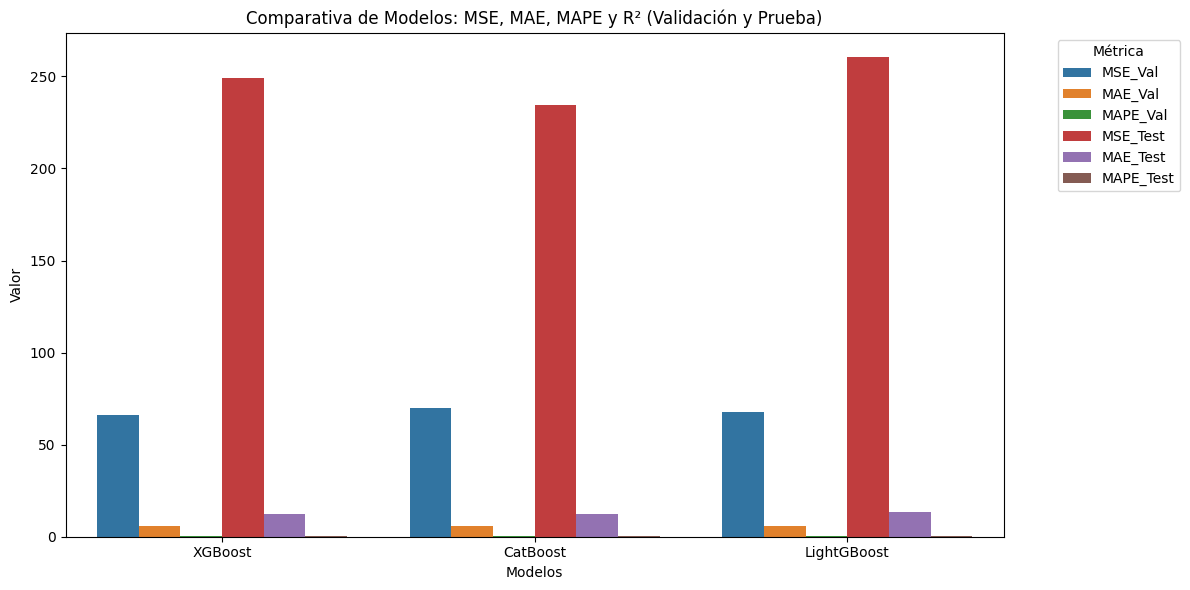


Resultados detallados:
        Modelo    MSE_Val   MAE_Val  MAPE_Val    MSE_Test   MAE_Test  \
0      XGBoost  66.159923  5.659428  0.217219  249.060559  12.242690   
1     CatBoost  69.845215  5.891851  0.217980  234.574969  12.145381   
2  LightGBoost  67.849201  6.032006  0.230093  260.653357  13.205054   

   MAPE_Test  
0   0.574200  
1   0.581109  
2   0.620098  


In [ ]:
# LightGBoost
# Sin usar categóricas
vars_explicativas = variab5

X = trainDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
y = trainDL['Rend_Ofensivo'][(df['Rend_Ofensivo'] > 10)]


# Luego, dividir entrenamiento (80%) y validación (10%) del 90% restante
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1111, random_state=42)

# Usar testDL como conjunto de prueba final
X_test_final = testDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
y_test_final = testDL['Rend_Ofensivo'][(df['Rend_Ofensivo'] > 10)]

#'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'num_leaves': 20, 'subsample': 0.8
modelo5_1 = LGBMRegressor(learning_rate=0.05,max_depth=5, n_estimators=200, num_leaves =  20,subsample=0.8,random_state=4)
resultados.append(evaluar_modelo("LightGBoost", modelo5_1, X_train, y_train, X_val, y_val, X_test_final, y_test_final))

resultados = resultados[-3:]  # mantiene solo los últimos 3
#resultados_df = pd.DataFrame(resultados)

# Crear DataFrame con resultados
resultados_DL = pd.DataFrame(resultados)

# Visualización comparativa
resultados_melted = resultados_DL.melt(id_vars="Modelo", value_vars=["MSE_Val", "MAE_Val", "MAPE_Val", "MSE_Test", "MAE_Test", "MAPE_Test"],
                                       var_name="Métrica", value_name="Valor")

plt.figure(figsize=(12, 6))
sns.barplot(data=resultados_melted, x="Modelo", y="Valor", hue="Métrica")
plt.title("Comparativa de Modelos: MSE, MAE, MAPE y R² (Validación y Prueba)")
plt.xlabel("Modelos")
plt.ylabel("Valor")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Mostrar resultados numéricos
print("\nResultados detallados:")
print(resultados_DL)



tabpfn-v2-regressor.ckpt:   0%|          | 0.00/44.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

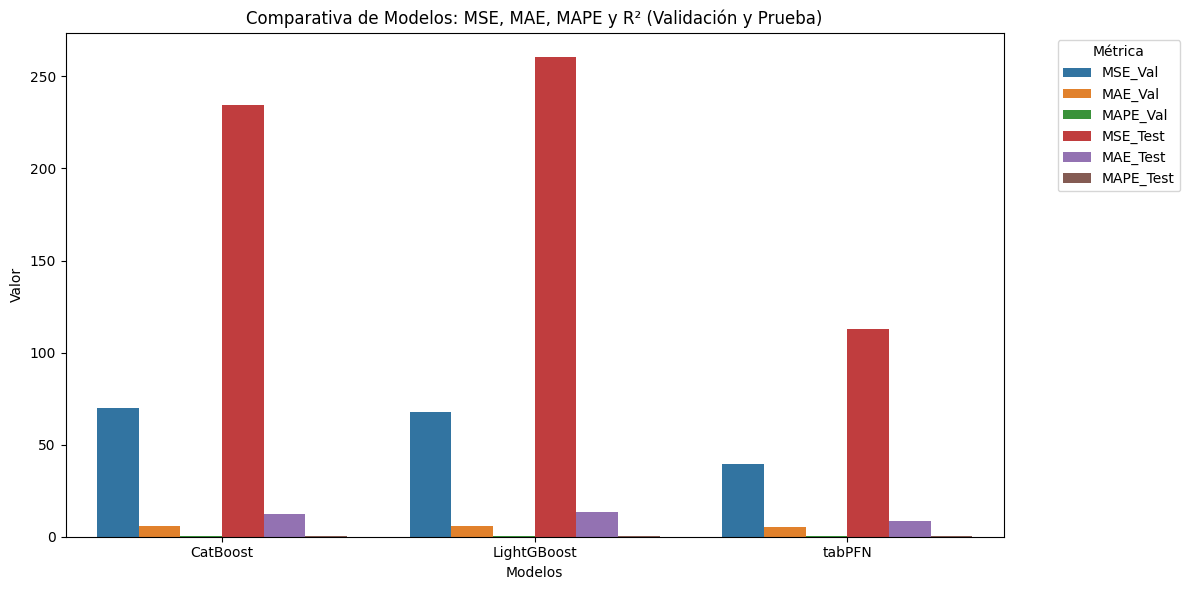


Resultados detallados:
        Modelo    MSE_Val   MAE_Val  MAPE_Val    MSE_Test   MAE_Test  \
0     CatBoost  69.845215  5.891851  0.217980  234.574969  12.145381   
1  LightGBoost  67.849201  6.032006  0.230093  260.653357  13.205054   
2       tabPFN  39.652599  5.109973  0.185814  112.837829   8.372217   

   MAPE_Test  
0   0.581109  
1   0.620098  
2   0.397031  


In [ ]:
# tabPFN

modelo6_1 = TabPFNRegressor()
resultados.append(evaluar_modelo("tabPFN", modelo6_1, X_train, y_train, X_val, y_val, X_test_final, y_test_final))

resultados = resultados[-3:]

# Crear DataFrame con resultados
resultados_DL = pd.DataFrame(resultados)

# Visualización comparativa
resultados_melted = resultados_DL.melt(id_vars="Modelo", value_vars=["MSE_Val", "MAE_Val", "MAPE_Val", "MSE_Test", "MAE_Test", "MAPE_Test"],
                                       var_name="Métrica", value_name="Valor")

plt.figure(figsize=(12, 6))
sns.barplot(data=resultados_melted, x="Modelo", y="Valor", hue="Métrica")
plt.title("Comparativa de Modelos: MSE, MAE, MAPE y R² (Validación y Prueba)")
plt.xlabel("Modelos")
plt.ylabel("Valor")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Mostrar resultados numéricos
print("\nResultados detallados:")
print(resultados_DL)

# A partir de los errores del LightBoost podríamos dudar de haber overfitting

# El MAPE de 39% nos indicaque el modelo es bueno, pero CatBoost sigue siendo el mejor modelo, con menor MAPE 4%
# Al final concluimos que nuestro mejor modelo predictivo es tabPFN

In [ ]:
# Nos quedamos con el modelo tabPFN para ver cómo funciona comparado con el mejor

y_pred11 = modelo6_1.predict(X_test_final)

# No podemos utilizar SHAP en redes neuronales debido a que tenemos un ordenador muy malo

In [ ]:
# Nos quedamos con el modelo CatBoost para predecir
vars_explicativas = [col for col in df.columns if col not in ['Jugador','País','Gls','Ass','Pases.Peligrosos','G/T','RegatesExt', 'Valor Mercado (millones de e)']]

X_test_final = testDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
y_test_final = testDL['Rend_Ofensivo'][(df['Rend_Ofensivo'] > 10)]



y_pred12 = modelo4_1.predict(X_test_final)

/tmp/ipython-input-48-586106240.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_final = testDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]


In [ ]:
jugadores_test = df.loc[X_test_final.index, 'Jugador']

tabla_resultados = pd.DataFrame({
    'Jugador': df.loc[X_test_final.index, 'Jugador'].values,
    'Valor_Predicho TabPFN': y_pred11,
    'Valor_Predicho CatB': y_pred12,
    'Valor': df.loc[X_test_final.index, 'Valor Mercado (millones de e)'].values
})

# Shortlist defensas
top_25_1 = tabla_resultados.sort_values(by='Valor_Predicho TabPFN', ascending=False).head(25)
top_25_1

# Vamos a confiar más en las predicciones ofreciadas por el mejor modelo, es decir CatBoost

,Jugador,Valor_Predicho TabPFN,Valor_Predicho CatB,Valor
122,Son Heung-min,75.974945,82.757944,45.000000
4,Cole Palmer,70.929802,52.597334,80.000000
3,Phil Foden,67.207169,79.471154,150.000000
17,Mohamed Salah,63.387585,58.486267,55.000000
14,Dejan Kulusevski,61.489124,55.177124,55.000000
2,Bukayo Saka,61.465042,80.124190,140.000000
46,Robert Lewandowski,61.038841,63.946547,20.000000
12,Anthony Gordon,60.069935,52.782985,60.000000
51,Iago Aspas,56.379200,49.548375,3.000000
41,Antoine Griezmann,54.576302,63.237695,25.000000


Encontrar los mejores hiperparámetros

In [ ]:
# Importancia de las variables
'''
importancia = modelo3_1.feature_importances_
importancia_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': importancia
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(importancia_df['Variable'], importancia_df['Importancia'])
plt.gca().invert_yaxis()
plt.title('Importancia de las variables')
plt.show()
importancia_df
'''

"\nimportancia = modelo3_1.feature_importances_\nimportancia_df = pd.DataFrame({\n    'Variable': X_train.columns,\n    'Importancia': importancia\n}).sort_values(by='Importancia', ascending=False)\n\nplt.figure(figsize=(8,5))\nplt.barh(importancia_df['Variable'], importancia_df['Importancia'])\nplt.gca().invert_yaxis()\nplt.title('Importancia de las variables')\nplt.show()\nimportancia_df\n"

In [ ]:
# Mejorar hiperparámetros con GridSearch
# Tarda 1 min en compilar

vars_explicativas = variab5

X = trainDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
y = trainDL['Rend_Ofensivo'][(df['Rend_Ofensivo'] > 10)]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1111, random_state=42)

X_test_final = testDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
y_test_final = testDL['Rend_Ofensivo'][(df['Rend_Ofensivo'] > 10)]


# Definir param_grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(
    modelo3_1,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=1,  # Cambiado a 1 para evitar problemas en Colab
    error_score='raise'
)

# Entrenar
try:
    grid_search.fit(X_train, y_train)
    modelo_xgb = grid_search.best_estimator_
    mejores_params_xgb = grid_search.best_params_

    # Entrenar mejor modelo
    modelo_xgb.fit(X_train, y_train)

    # Predicciones y métricas
    y_pred_val = modelo_xgb.predict(X_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    mae_val = mean_absolute_error(y_val, y_pred_val)
    mape_val = mean_absolute_percentage_error(y_val, y_pred_val)

    y_pred_test = modelo_xgb.predict(X_test_final)
    mse_test = mean_squared_error(y_test_final, y_pred_test)
    mae_test = mean_absolute_error(y_test_final, y_pred_test)
    mape_test = mean_absolute_percentage_error(y_test_final, y_pred_test)

    # Resultados
    print("XGBoost - Mejores parámetros:", mejores_params_xgb)
    print(f"Validación - MSE: {mse_val:.2f}, MAE: {mae_val:.2f}, MAPE: {mape_val:.2f}%")
    print(f"Prueba - MSE: {mse_test:.2f}, MAE: {mae_test:.2f}, MAPE: {mape_test:.2f}%")
except Exception as e:
    print("Error en XGBoost:", str(e))

/tmp/ipython-input-51-1774272542.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = trainDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
/tmp/ipython-input-51-1774272542.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_final = testDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]


XGBoost - Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Validación - MSE: 66.16, MAE: 5.66, MAPE: 0.22%
Prueba - MSE: 249.06, MAE: 12.24, MAPE: 0.57%


In [ ]:
vars_explicativas = [col for col in df.columns if col not in ['Jugador','País','Gls','Ass','Pases.Peligrosos','G/T','RegatesExt', 'Valor Mercado (millones de e)','Rend_Ofensivo', 'Rend_Defensivo']]


X = trainDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
y = trainDL['Rend_Ofensivo'][(df['Rend_Ofensivo'] > 10)]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1111, random_state=42)

X_test_final = testDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
y_test_final = testDL['Rend_Ofensivo'][(df['Rend_Ofensivo'] > 10)]



# Define param_grid (use 'iterations' instead of 'n_estimators')
param_grid = {
    'iterations': [100, 200],
    'depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'l2_leaf_reg': [3, 5]
}


# GridSearchCV
grid_search = GridSearchCV(
    CatBoostRegressor(cat_features=cat_features, random_state=42, verbose=0),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=1,
    error_score='raise'
)

# Train
try:
    grid_search.fit(X_train, y_train)
    modelo_cat = grid_search.best_estimator_
    mejores_params_cat = grid_search.best_params_

    # Train best model
    modelo_cat.fit(X_train, y_train)

    # Predictions and metrics
    y_pred_val = modelo_cat.predict(X_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    mae_val = mean_absolute_error(y_val, y_pred_val)
    mape_val = mean_absolute_percentage_error(y_val, y_pred_val) * 100

    y_pred_test = modelo_cat.predict(X_test_final)
    mse_test = mean_squared_error(y_test_final, y_pred_test)
    mae_test = mean_absolute_error(y_test_final, y_pred_test)
    mape_test = mean_absolute_percentage_error(y_test_final, y_pred_test) * 100

    # Results
    print("CatBoost - Mejores parámetros:", mejores_params_cat)
    print(f"Validación - MSE: {mse_val:.2f}, MAE: {mae_val:.2f}, MAPE: {mape_val:.2f}%")
    print(f"Prueba - MSE: {mse_test:.2f}, MAE: {mae_test:.2f}, MAPE: {mape_test:.2f}%")
except Exception as e:
    print("Error en CatBoost:", str(e))

/tmp/ipython-input-52-3414006277.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = trainDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
/tmp/ipython-input-52-3414006277.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_final = testDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]


CatBoost - Mejores parámetros: {'depth': 3, 'iterations': 200, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
Validación - MSE: 66.69, MAE: 5.80, MAPE: 21.73%
Prueba - MSE: 243.17, MAE: 12.06, MAPE: 56.81%


In [ ]:
vars_explicativas = variab5

X = trainDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
y = trainDL['Rend_Ofensivo'][(df['Rend_Ofensivo'] > 10)]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1111, random_state=42)

X_test_final = testDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
y_test_final = testDL['Rend_Ofensivo'][(df['Rend_Ofensivo'] > 10)]




# Definir param_grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'num_leaves': [20, 31]
}

# GridSearchCV
grid_search = GridSearchCV(
    modelo5_1,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=1,
    error_score='raise'
)

# Entrenar
try:
    grid_search.fit(X_train, y_train)
    modelo_lgb = grid_search.best_estimator_
    mejores_params_lgb = grid_search.best_params_

    # Entrenar mejor modelo
    modelo_lgb.fit(X_train, y_train)

    # Predicciones y métricas
    y_pred_val = modelo_lgb.predict(X_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    mae_val = mean_absolute_error(y_val, y_pred_val)
    mape_val = mean_absolute_percentage_error(y_val, y_pred_val)

    y_pred_test = modelo_lgb.predict(X_test_final)
    mse_test = mean_squared_error(y_test_final, y_pred_test)
    mae_test = mean_absolute_error(y_test_final, y_pred_test)
    mape_test = mean_absolute_percentage_error(y_test_final, y_pred_test)

    # Resultados
    print("LightGBM - Mejores parámetros:", mejores_params_lgb)
    print(f"Validación - MSE: {mse_val:.2f}, MAE: {mae_val:.2f}, MAPE: {mape_val:.2f}%")
    print(f"Prueba - MSE: {mse_test:.2f}, MAE: {mae_test:.2f}, MAPE: {mape_test:.2f}%")
except Exception as e:
    print("Error en LightGBM:", str(e))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1901
[LightGBM] [Info] Number of data points in the train set: 345, number of used features: 38
[LightGBM] [Info] Start training from score 28.930258
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/tmp/ipython-input-53-3700729705.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = trainDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
/tmp/ipython-input-53-3700729705.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_final = testDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]


Se han truncado las últimas 5000 líneas del flujo de salida.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

TabPFN no permite RandomSearch

In [ ]:
# Utilizar CatBoost para predecir con variables categóricas también

vars_explicativas = [col for col in df.columns if col not in ['Jugador','País','Gls','Ass','Pases.Peligrosos','G/T','RegatesExt', 'Valor Mercado (millones de e)','Rend_Ofensivo', 'Rend_Defensivo']]


X = trainDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
y = trainDL['Rend_Ofensivo'][(df['Rend_Ofensivo'] > 10)]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1111, random_state=42)

X_test_final = testDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
y_test_final = testDL['Rend_Ofensivo'][(df['Rend_Ofensivo'] > 10)]

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1]
}

cat_features = ['Equipo','Posc','Liga']

base_model = CatBoostRegressor(cat_features=cat_features, random_state=42, verbose=0)

grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

mejores_params = grid_search.best_params_


modelo3 = grid_search.best_estimator_

modelo3.fit(X_train, y_train)



y_pred_val = modelo3.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
mape_val = mean_absolute_percentage_error(y_val, y_pred_val)

y_pred_test = modelo3.predict(X_test_final)
mse_test = mean_squared_error(y_test_final, y_pred_test)
mae_test = mean_absolute_error(y_test_final, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test_final, y_pred_test)

mape_test, mape_val, mse_test, mse_val
mejores_params
# mejores_paramsCatB: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

/tmp/ipython-input-54-1125781665.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = trainDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
/tmp/ipython-input-54-1125781665.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_final = testDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}

In [ ]:
# Obtener importancias de las características
importances = modelo3.feature_importances_
feature_names = X_train.columns

# Crear DataFrame con nombres e importancias
importance_df = pd.DataFrame({'Variable': feature_names, 'Importancia': importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Seleccionar las 6 variables más importantes
top_6_vars = importance_df['Variable'].head(6).tolist()
print("Las 6 variables más importantes:", top_6_vars)

Las 6 variables más importantes: ['Mín', 'onG', 'xAG', 'Avances', 'Titular', 'PJ']


In [ ]:
# Quedarme con las mejores variables

selector = SelectFromModel(estimator=modelo3, threshold="median")  # o usar un umbral fijo
selector.fit(X_train, y_train)

X_train_reducido = selector.transform(X_train)
X_val_reducido = selector.transform(X_val)
X_test_reducido = selector.transform(X_test_final)

selected_vars = X_train.columns[selector.get_support()]
selected_vars

Index(['Posc', 'Edad', 'PJ', 'Titular', 'Mín', '90 s', 'Penal.Anotado', 'xAG',
       'Avances', 'Pases.Recibidos', 'Salario semanal', 'Salario anual', 'Dis',
       'G-xG', 'Posesion', 'Regates', 'RegExitosos%', 'DesafiosDef',
       'Despejes', 'onG', 'DesafiosExt'],
      dtype='object')

# **Jugadores defensivos**

In [ ]:
#vars_explicativas = ['Gls','Ass','Pases.Peligrosos','G/T','RegatesExt']
vars_explicativas = variab6

trainDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]

/tmp/ipython-input-57-1034260356.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trainDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]


,Edad,PJ,PG,PE,PP,Puntosjugador,Pts,Titular,Suplente,Mín,...,Posesion,Regates,RegatesExt,RegExitosos%,DesafiosDef,DesafExt%,Despejes,onG,onGC,Dentro-Fuera_xG
0,23.0,31.0,28.0,7.0,3.0,2.320000,91.0,29.0,2.000000,2552.0,...,65.2,30.000000,12.000000,40.000000,3.000000,66.700000,16.000000,65.000000,25.000000,-0.020000
1,20.0,28.0,29.0,8.0,1.0,2.460000,95.0,27.0,1.000000,2315.0,...,59.2,97.000000,50.000000,51.500000,36.000000,33.300000,17.000000,57.000000,16.000000,0.090000
2,16.0,37.0,26.0,7.0,5.0,2.220000,85.0,22.0,15.000000,2201.0,...,64.3,160.000000,70.000000,43.800000,48.000000,37.500000,11.000000,57.000000,33.000000,-0.150000
3,21.0,35.0,28.0,5.0,5.0,2.290000,89.0,35.0,0.000000,2919.0,...,58.2,122.000000,49.000000,40.200000,59.000000,44.100000,24.000000,78.000000,27.000000,0.040000
4,23.0,35.0,28.0,7.0,3.0,2.340000,91.0,33.0,2.000000,2857.0,...,65.2,102.000000,47.000000,46.100000,31.000000,41.900000,18.000000,75.000000,27.000000,-0.180000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,27.0,11.0,8.0,16.0,14.0,1.057678,40.0,4.0,6.634695,353.0,...,45.0,33.000000,21.000000,63.600000,23.169807,50.316411,24.044976,0.355910,2.496018,-0.041613
997,24.0,10.0,4.0,9.0,25.0,0.543295,21.0,0.0,9.874630,157.0,...,45.6,5.000000,3.000000,60.000000,21.348533,50.433590,26.810531,-1.777089,12.880637,-0.235109
998,21.0,15.0,13.0,10.0,15.0,1.270452,49.0,5.0,9.571297,649.0,...,44.3,29.000000,13.000000,44.800000,24.433311,48.538175,29.124986,7.285788,7.884314,0.024757
1001,26.0,24.0,13.0,8.0,17.0,1.226186,47.0,13.0,10.827266,1122.0,...,50.6,24.383594,11.512382,47.241317,24.893505,46.442541,26.679808,17.797243,20.805915,-0.028428


/tmp/ipython-input-58-2432864368.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = trainDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]
/tmp/ipython-input-58-2432864368.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_final = testDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]


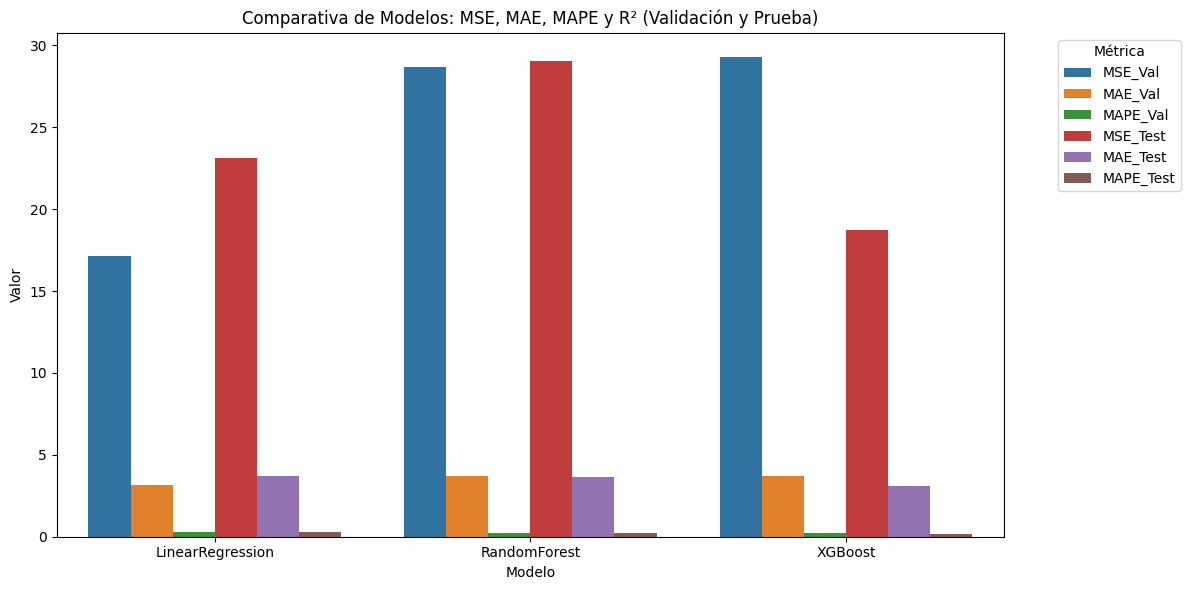


Resultados detallados:
             Modelo    MSE_Val   MAE_Val  MAPE_Val   MSE_Test  MAE_Test  \
0  LinearRegression  17.168711  3.176511  0.286009  23.148349  3.687764   
1      RandomForest  28.688346  3.687650  0.227473  29.063727  3.673018   
2           XGBoost  29.306920  3.713721  0.228226  18.740038  3.106083   

   MAPE_Test  
0   0.278464  
1   0.201486  
2   0.183960  


In [ ]:
X = trainDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]
y = trainDF['Rend_Defensivo'][(df['Rend_Defensivo'] > 1)]


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1111, random_state=42)

X_test_final = testDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]
y_test_final = testDF['Rend_Defensivo'][(df['Rend_Defensivo'] > 1)]


# Entrenar y evaluar los modelos
resultados = []

# Regresión lineal
modelo1_2 = LinearRegression()
resultados.append(evaluar_modelo("LinearRegression", modelo1_2, X_train, y_train, X_val, y_val, X_test_final, y_test_final))

# Random Forest
modelo2_2 = RandomForestRegressor(n_estimators=100, random_state=42)
resultados.append(evaluar_modelo("RandomForest", modelo2_2, X_train, y_train, X_val, y_val, X_test_final, y_test_final))


# XGBoost
modelo3_2 = XGBRegressor(learning_rate=0.05,max_depth=3,n_estimators=200,subsample=0.8,random_state=4)
resultados.append(evaluar_modelo("XGBoost", modelo3_2, X_train, y_train, X_val, y_val, X_test_final, y_test_final))


# Crear DataFrame con resultados
resultados_DF = pd.DataFrame(resultados)

# Visualización comparativa
resultados_melted = resultados_DF.melt(id_vars="Modelo", value_vars=["MSE_Val", "MAE_Val", "MAPE_Val", "MSE_Test", "MAE_Test", "MAPE_Test"],
                                       var_name="Métrica", value_name="Valor")

plt.figure(figsize=(12, 6))
sns.barplot(data=resultados_melted, x="Modelo", y="Valor", hue="Métrica")
plt.title("Comparativa de Modelos: MSE, MAE, MAPE y R² (Validación y Prueba)")
plt.xlabel("Modelo")
plt.ylabel("Valor")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Mostrar resultados numéricos
print("\nResultados detallados:")
print(resultados_DF)



0:	learn: 13.8228038	total: 1.35ms	remaining: 268ms
1:	learn: 13.4084228	total: 2.59ms	remaining: 257ms
2:	learn: 13.0000643	total: 3.58ms	remaining: 235ms
3:	learn: 12.6982710	total: 4.59ms	remaining: 225ms
4:	learn: 12.3548776	total: 5.64ms	remaining: 220ms
5:	learn: 12.0837664	total: 6.78ms	remaining: 219ms
6:	learn: 11.7636953	total: 7.88ms	remaining: 217ms
7:	learn: 11.4756311	total: 9.08ms	remaining: 218ms
8:	learn: 11.1990235	total: 10.2ms	remaining: 218ms
9:	learn: 10.8996070	total: 11.4ms	remaining: 217ms
10:	learn: 10.6535574	total: 12.4ms	remaining: 214ms
11:	learn: 10.3672344	total: 13.5ms	remaining: 211ms
12:	learn: 10.1173432	total: 14.5ms	remaining: 208ms
13:	learn: 9.9009037	total: 15.7ms	remaining: 208ms
14:	learn: 9.6757066	total: 16.8ms	remaining: 207ms
15:	learn: 9.4269950	total: 17.7ms	remaining: 204ms
16:	learn: 9.2338555	total: 18.8ms	remaining: 202ms
17:	learn: 8.9978643	total: 19.7ms	remaining: 200ms
18:	learn: 8.7995665	total: 20.7ms	remaining: 197ms
19:	learn

/tmp/ipython-input-59-421864140.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = trainDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]
/tmp/ipython-input-59-421864140.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_final = testDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]


154:	learn: 3.4309460	total: 162ms	remaining: 47ms
155:	learn: 3.4250301	total: 163ms	remaining: 45.9ms
156:	learn: 3.4229230	total: 164ms	remaining: 44.8ms
157:	learn: 3.4089375	total: 165ms	remaining: 43.8ms
158:	learn: 3.4050577	total: 166ms	remaining: 42.7ms
159:	learn: 3.3911514	total: 167ms	remaining: 41.7ms
160:	learn: 3.3869810	total: 168ms	remaining: 40.6ms
161:	learn: 3.3747631	total: 169ms	remaining: 39.5ms
162:	learn: 3.3636973	total: 170ms	remaining: 38.5ms
163:	learn: 3.3611538	total: 171ms	remaining: 37.4ms
164:	learn: 3.3498822	total: 171ms	remaining: 36.4ms
165:	learn: 3.3394287	total: 172ms	remaining: 35.3ms
166:	learn: 3.3269172	total: 173ms	remaining: 34.3ms
167:	learn: 3.3160248	total: 175ms	remaining: 33.2ms
168:	learn: 3.3112195	total: 177ms	remaining: 32.5ms
169:	learn: 3.3092965	total: 181ms	remaining: 31.9ms
170:	learn: 3.3026724	total: 182ms	remaining: 30.9ms
171:	learn: 3.3005310	total: 184ms	remaining: 30ms
172:	learn: 3.2905140	total: 186ms	remaining: 29ms

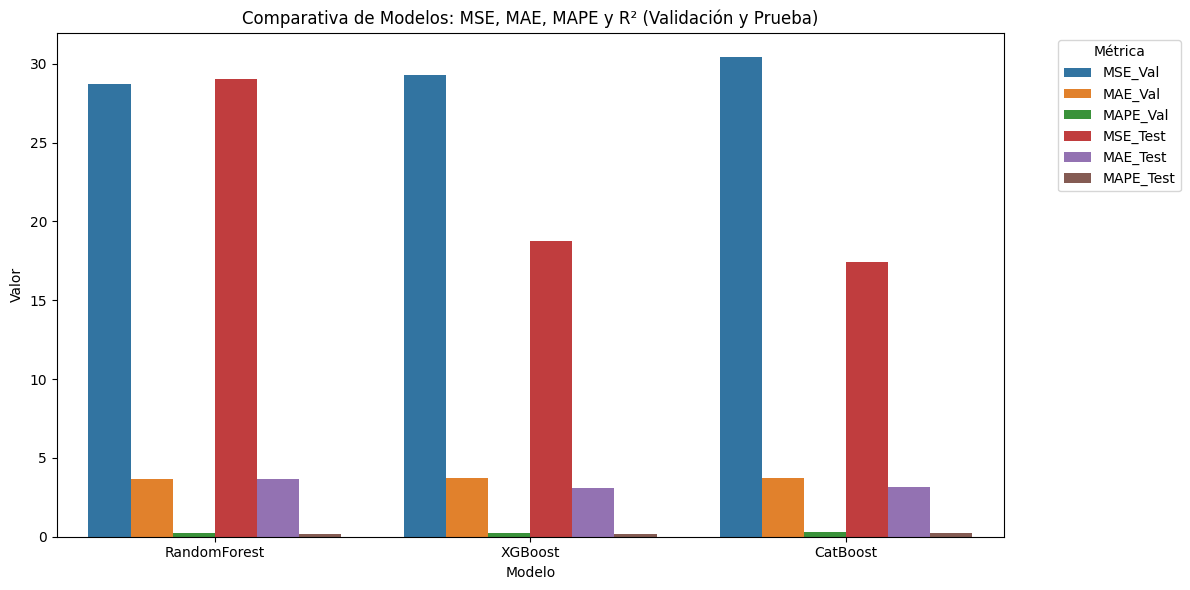


Resultados detallados:
         Modelo    MSE_Val   MAE_Val  MAPE_Val   MSE_Test  MAE_Test  MAPE_Test
0  RandomForest  28.688346  3.687650  0.227473  29.063727  3.673018   0.201486
1       XGBoost  29.306920  3.713721  0.228226  18.740038  3.106083   0.183960
2      CatBoost  30.438430  3.700195  0.283162  17.427118  3.158960   0.226114


In [ ]:
# CatBoost
vars_explicativas = [col for col in df.columns if col not in ['Jugador','País','DisBloq','Pases.Peligrosos','Dentro-Fuera','Intercep','DesafiosExt', 'Valor Mercado (millones de e)','Rend_Ofensivo', 'Rend_Defensivo']]

X = trainDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]
y = trainDF['Rend_Defensivo'][(df['Rend_Defensivo'] > 1)]


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1111, random_state=42)

X_test_final = testDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]
y_test_final = testDF['Rend_Defensivo'][(df['Rend_Defensivo'] > 1)]

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1]
}

cat_features = ['Equipo','Posc','Liga']


modelo4_2 = CatBoostRegressor(cat_features=cat_features, learning_rate=0.05,max_depth=3,n_estimators=200,subsample=0.8,random_state=4)


# CatBoost
#modelo4_2 = CatBoostRegressor(learning_rate=0.05,max_depth=3,n_estimators=200,subsample=0.8,random_state=4)
resultados.append(evaluar_modelo("CatBoost", modelo4_2, X_train, y_train, X_val, y_val, X_test_final, y_test_final))

resultados = resultados[-3:]  # mantiene solo los últimos 3

# Crear DataFrame con resultados
resultados_df = pd.DataFrame(resultados)

# Visualización comparativa
resultados_melted = resultados_df.melt(id_vars="Modelo", value_vars=["MSE_Val", "MAE_Val", "MAPE_Val", "MSE_Test", "MAE_Test", "MAPE_Test"],
                                       var_name="Métrica", value_name="Valor")

plt.figure(figsize=(12, 6))
sns.barplot(data=resultados_melted, x="Modelo", y="Valor", hue="Métrica")
plt.title("Comparativa de Modelos: MSE, MAE, MAPE y R² (Validación y Prueba)")
plt.xlabel("Modelo")
plt.ylabel("Valor")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Mostrar resultados numéricos
print("\nResultados detallados:")
print(resultados_df)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2151
[LightGBM] [Info] Number of data points in the train set: 485, number of used features: 38
[LightGBM] [Info] Start training from score 16.319015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/tmp/ipython-input-60-2732500891.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = trainDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]
/tmp/ipython-input-60-2732500891.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_final = testDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]


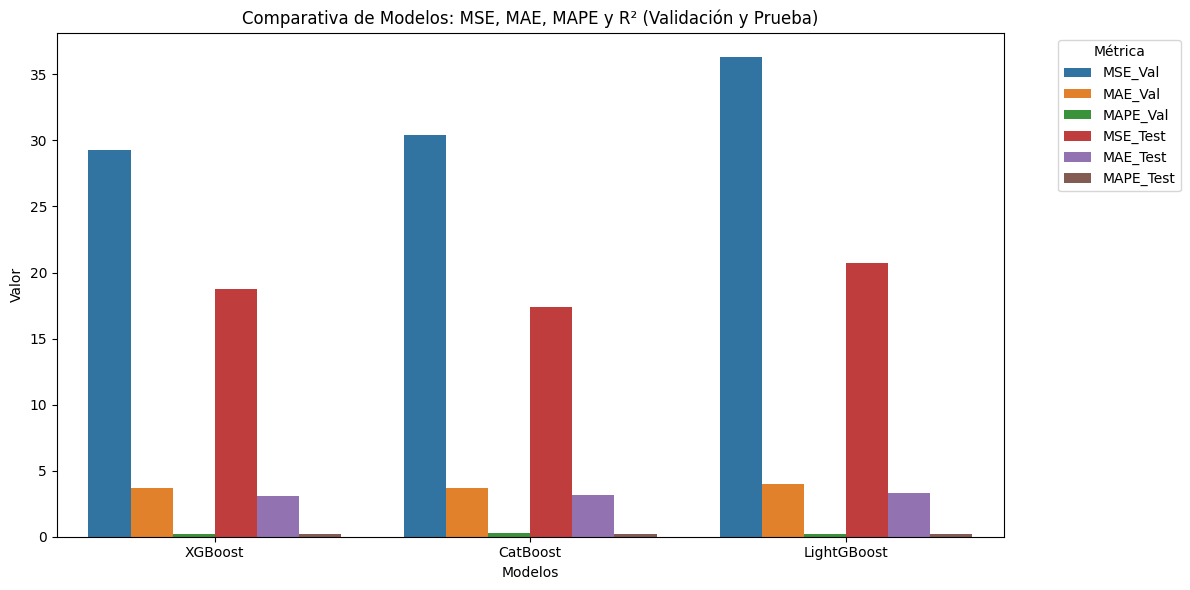


Resultados detallados:
        Modelo    MSE_Val   MAE_Val  MAPE_Val   MSE_Test  MAE_Test  MAPE_Test
0      XGBoost  29.306920  3.713721  0.228226  18.740038  3.106083   0.183960
1     CatBoost  30.438430  3.700195  0.283162  17.427118  3.158960   0.226114
2  LightGBoost  36.327411  3.968528  0.237285  20.753661  3.314183   0.189653


In [ ]:
# LightGBoost
vars_explicativas = variab6

X = trainDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]
y = trainDF['Rend_Defensivo'][(df['Rend_Defensivo'] > 1)]


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1111, random_state=42)

X_test_final = testDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]
y_test_final = testDF['Rend_Defensivo'][(df['Rend_Defensivo'] > 1)]


modelo5_2 = LGBMRegressor(learning_rate=0.05,max_depth=3,n_estimators=200,subsample=0.8,random_state=4)
resultados.append(evaluar_modelo("LightGBoost", modelo5_2, X_train, y_train, X_val, y_val, X_test_final, y_test_final))

resultados = resultados[-3:]  # mantiene solo los últimos 3
#resultados_df = pd.DataFrame(resultados)

# Crear DataFrame con resultados
resultados_df = pd.DataFrame(resultados)

# Visualización comparativa
resultados_melted = resultados_df.melt(id_vars="Modelo", value_vars=["MSE_Val", "MAE_Val", "MAPE_Val", "MSE_Test", "MAE_Test", "MAPE_Test"],
                                       var_name="Métrica", value_name="Valor")

plt.figure(figsize=(12, 6))
sns.barplot(data=resultados_melted, x="Modelo", y="Valor", hue="Métrica")
plt.title("Comparativa de Modelos: MSE, MAE, MAPE y R² (Validación y Prueba)")
plt.xlabel("Modelos")
plt.ylabel("Valor")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Mostrar resultados numéricos
print("\nResultados detallados:")
print(resultados_df)



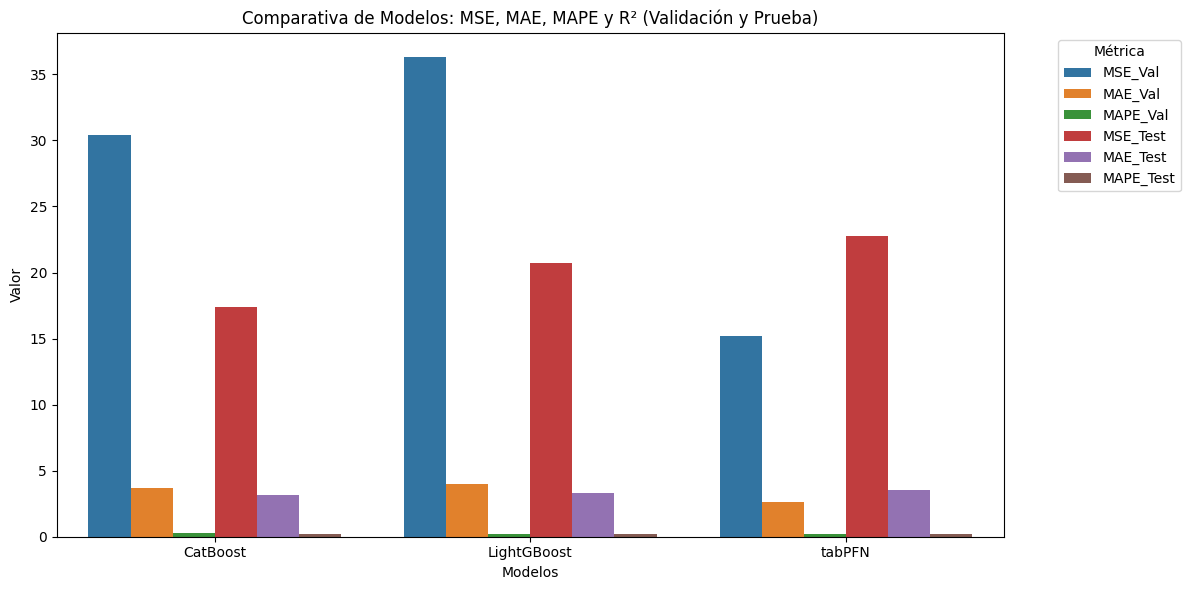


Resultados detallados:
        Modelo    MSE_Val   MAE_Val  MAPE_Val   MSE_Test  MAE_Test  MAPE_Test
0     CatBoost  30.438430  3.700195  0.283162  17.427118  3.158960   0.226114
1  LightGBoost  36.327411  3.968528  0.237285  20.753661  3.314183   0.189653
2       tabPFN  15.210899  2.612856  0.171081  22.801934  3.504409   0.198577


In [ ]:
# tabPFN

modelo6_2 = TabPFNRegressor()
resultados.append(evaluar_modelo("tabPFN", modelo6_2, X_train, y_train, X_val, y_val, X_test_final, y_test_final))

resultados = resultados[-3:]

# Crear DataFrame con resultados
resultados_df = pd.DataFrame(resultados)

# Visualización comparativa
resultados_melted = resultados_df.melt(id_vars="Modelo", value_vars=["MSE_Val", "MAE_Val", "MAPE_Val", "MSE_Test", "MAE_Test", "MAPE_Test"],
                                       var_name="Métrica", value_name="Valor")

plt.figure(figsize=(12, 6))
sns.barplot(data=resultados_melted, x="Modelo", y="Valor", hue="Métrica")
plt.title("Comparativa de Modelos: MSE, MAE, MAPE y R² (Validación y Prueba)")
plt.xlabel("Modelos")
plt.ylabel("Valor")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Mostrar resultados numéricos
print("\nResultados detallados:")
print(resultados_df)

# A partir de los errores del LightBoost podríamos dudar de haber overfitting

# El MAPE de 1.3% nos indicaque el modelo es muy bueno, pero RL sigue siendo el mejor modelo, con menor MAPE
# Al final concluimos que nuestro mejor modelo predictivo es tabPFN

In [ ]:
# Nos quedamos con el modelo tabPFN para ver cómo funciona comparado con el mejor

y_pred21 = modelo6_2.predict(X_test_final)

# No podemos utilizar SHAP en redes neuronales debido a que tenemos un ordenador muy malo

In [ ]:
# Nos quedamos con el modelo CatBoost para predecir
vars_explicativas = [col for col in df.columns if col not in ['Jugador','País','DisBloq','Pases.Peligrosos','Dentro-Fuera','Intercep','DesafiosExt', 'Valor Mercado (millones de e)','Rend_Ofensivo', 'Rend_Defensivo']]

vars_explicativas = variab6

X = trainDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]
y = trainDF['Rend_Defensivo'][(df['Rend_Defensivo'] > 1)]


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1111, random_state=42)

X_test_final = testDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]
y_test_final = testDF['Rend_Defensivo'][(df['Rend_Defensivo'] > 1)]


y_pred22 = modelo5_2.predict(X_test_final)

/tmp/ipython-input-63-94896607.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = trainDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]
/tmp/ipython-input-63-94896607.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_final = testDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]


In [ ]:
jugadores_test = df.loc[X_test_final.index, 'Jugador']

tabla_resultados = pd.DataFrame({
    'Jugador': df.loc[X_test_final.index, 'Jugador'].values,
    'Valor_Predicho TabPFN': y_pred21,
    'Valor_Predicho LightB': y_pred22,
    'Valor': df.loc[X_test_final.index, 'Valor Mercado (millones de e)'].values
})

# Shortlist defensas
top_25_2 = tabla_resultados.sort_values(by='Valor_Predicho TabPFN', ascending=False).head(25)
top_25_2

# Vamos a confiar más en las predicciones ofreciadas por el mejor modelo, es decir LightBoost

,Jugador,Valor_Predicho TabPFN,Valor_Predicho LightB,Valor
17,Pedro Porro,64.673706,58.323445,60.000000
137,Antonee Robinson,60.035748,53.087587,30.000000
260,Joachim Andersen,57.415974,41.642833,35.000000
23,Diogo Dalot,57.367813,55.124224,35.000000
79,Daley Blind,57.046051,56.019161,3.000000
267,James Tarkowski,55.470909,47.187219,18.000000
222,Emerson Palmieri,54.283279,51.497897,12.000000
6,Jules Koundé,54.225552,54.765463,50.000000
287,Vladimír Coufal,52.194500,52.668421,8.000000
348,Illia Zabarnyi,51.714130,45.066683,32.000000


Probar redes neuronales simples

In [ ]:
# Dividir datos
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, random_state=42)

# Escalar datos (importante para redes neuronales)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test_final)

# Inicializar y entrenar MLP
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Predecir
y_pred = mlp.predict(X_test_scaled)

mape_test = mean_absolute_percentage_error(y_test_final, y_pred)
mape_test

# Nos sale un error parecido a los modelos RF y los otros ensemble
# No nos aporta mejoras

0.37332428511925514

Encontrar los mejores hiperparámetros

In [ ]:
# Mejorar hiperparámetros con GridSearch
# Tarda 1 min en compilar

vars_explicativas = variab6

X = trainDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]
y = trainDF['Rend_Defensivo'][(df['Rend_Defensivo'] > 1)]


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1111, random_state=42)

X_test_final = testDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]
y_test_final = testDF['Rend_Defensivo'][(df['Rend_Defensivo'] > 1)]


# Definir param_grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(
    modelo3_2,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=1,  # Cambiado a 1 para evitar problemas en Colab
    error_score='raise'
)

# Entrenar
try:
    grid_search.fit(X_train, y_train)
    modelo_xgb = grid_search.best_estimator_
    mejores_params_xgb = grid_search.best_params_

    # Entrenar mejor modelo
    modelo_xgb.fit(X_train, y_train)

    # Predicciones y métricas
    y_pred_val = modelo_xgb.predict(X_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    mae_val = mean_absolute_error(y_val, y_pred_val)
    mape_val = mean_absolute_percentage_error(y_val, y_pred_val)

    y_pred_test = modelo_xgb.predict(X_test_final)
    mse_test = mean_squared_error(y_test_final, y_pred_test)
    mae_test = mean_absolute_error(y_test_final, y_pred_test)
    mape_test = mean_absolute_percentage_error(y_test_final, y_pred_test)

    # Resultados
    print("XGBoost - Mejores parámetros:", mejores_params_xgb)
    print(f"Validación - MSE: {mse_val:.2f}, MAE: {mae_val:.2f}, MAPE: {mape_val:.2f}%")
    print(f"Prueba - MSE: {mse_test:.2f}, MAE: {mae_test:.2f}, MAPE: {mape_test:.2f}%")
except Exception as e:
    print("Error en XGBoost:", str(e))

/tmp/ipython-input-66-1617452978.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = trainDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]
/tmp/ipython-input-66-1617452978.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_final = testDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]


XGBoost - Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Validación - MSE: 31.14, MAE: 3.72, MAPE: 0.23%
Prueba - MSE: 19.22, MAE: 3.20, MAPE: 0.18%


In [ ]:
vars_explicativas = [col for col in df.columns if col not in ['Jugador','País','DisBloq','Pases.Peligrosos','Dentro-Fuera','Intercep','DesafiosExt' ,  'Valor Mercado (millones de e)','Rend_Ofensivo', 'Rend_Defensivo']]

X = trainDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]
y = trainDF['Rend_Defensivo'][(df['Rend_Defensivo'] > 1)]


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1111, random_state=42)

X_test_final = testDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]
y_test_final = testDF['Rend_Defensivo'][(df['Rend_Defensivo'] > 1)]



# Define param_grid (use 'iterations' instead of 'n_estimators')
param_grid = {
    'iterations': [100, 200],
    'depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'l2_leaf_reg': [3, 5]
}


# GridSearchCV
grid_search = GridSearchCV(
    CatBoostRegressor(cat_features=cat_features, random_state=42, verbose=0),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=1,
    error_score='raise'
)

# Train
try:
    grid_search.fit(X_train, y_train)
    modelo_cat = grid_search.best_estimator_
    mejores_params_cat = grid_search.best_params_

    # Train best model
    modelo_cat.fit(X_train, y_train)

    # Predictions and metrics
    y_pred_val = modelo_cat.predict(X_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    mae_val = mean_absolute_error(y_val, y_pred_val)
    mape_val = mean_absolute_percentage_error(y_val, y_pred_val) * 100

    y_pred_test = modelo_cat.predict(X_test_final)
    mse_test = mean_squared_error(y_test_final, y_pred_test)
    mae_test = mean_absolute_error(y_test_final, y_pred_test)
    mape_test = mean_absolute_percentage_error(y_test_final, y_pred_test) * 100

    # Results
    print("CatBoost - Mejores parámetros:", mejores_params_cat)
    print(f"Validación - MSE: {mse_val:.2f}, MAE: {mae_val:.2f}, MAPE: {mape_val:.2f}%")
    print(f"Prueba - MSE: {mse_test:.2f}, MAE: {mae_test:.2f}, MAPE: {mape_test:.2f}%")
except Exception as e:
    print("Error en CatBoost:", str(e))

/tmp/ipython-input-67-3072600212.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = trainDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]
/tmp/ipython-input-67-3072600212.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_final = testDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]


CatBoost - Mejores parámetros: {'depth': 5, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
Validación - MSE: 25.07, MAE: 3.36, MAPE: 23.28%
Prueba - MSE: 16.33, MAE: 3.06, MAPE: 19.60%


In [ ]:
vars_explicativas = variab6

X = trainDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]
y = trainDF['Rend_Defensivo'][(df['Rend_Defensivo'] > 1)]


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1111, random_state=42)

X_test_final = testDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]
y_test_final = testDF['Rend_Defensivo'][(df['Rend_Defensivo'] > 1)]


# Definir param_grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'num_leaves': [20, 31]
}

# GridSearchCV
grid_search = GridSearchCV(
    modelo5_2,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=1,
    error_score='raise'
)

# Entrenar
try:
    grid_search.fit(X_train, y_train)
    modelo_lgb = grid_search.best_estimator_
    mejores_params_lgb = grid_search.best_params_

    # Entrenar mejor modelo
    modelo_lgb.fit(X_train, y_train)

    # Predicciones y métricas
    y_pred_val = modelo_lgb.predict(X_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    mae_val = mean_absolute_error(y_val, y_pred_val)
    mape_val = mean_absolute_percentage_error(y_val, y_pred_val)

    y_pred_test = modelo_lgb.predict(X_test_final)
    mse_test = mean_squared_error(y_test_final, y_pred_test)
    mae_test = mean_absolute_error(y_test_final, y_pred_test)
    mape_test = mean_absolute_percentage_error(y_test_final, y_pred_test)

    # Resultados
    print("LightGBM - Mejores parámetros:", mejores_params_lgb)
    print(f"Validación - MSE: {mse_val:.2f}, MAE: {mae_val:.2f}, MAPE: {mape_val:.2f}%")
    print(f"Prueba - MSE: {mse_test:.2f}, MAE: {mae_test:.2f}, MAPE: {mape_test:.2f}%")
except Exception as e:
    print("Error en LightGBM:", str(e))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1874
[LightGBM] [Info] Number of data points in the train set: 388, number of used features: 38
[LightGBM] [Info] Start training from score 16.009205
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/tmp/ipython-input-68-3102298932.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = trainDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]
/tmp/ipython-input-68-3102298932.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_final = testDF[vars_explicativas][(df['Rend_Defensivo'] > 1)]


Se han truncado las últimas 5000 líneas del flujo de salida.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

TabPFN no permite RandomSearch

In [ ]:
# Utilizar CatBoost para predecir con variables categóricas también

vars_explicativas = [col for col in df.columns if col not in ['Jugador','País','Gls','Ass','Pases.Peligrosos','G/T','RegatesExt', 'Valor Mercado (millones de e)','Rend_Ofensivo', 'Rend_Defensivo']]


X = trainDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
y = trainDL['Rend_Ofensivo'][(df['Rend_Ofensivo'] > 10)]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1111, random_state=42)

X_test_final = testDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
y_test_final = testDL['Rend_Ofensivo'][(df['Rend_Ofensivo'] > 10)]

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1]
}

cat_features = ['Equipo','Posc','Liga']

base_model = CatBoostRegressor(cat_features=cat_features, random_state=42, verbose=0)

grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

mejores_params = grid_search.best_params_


modelo4 = grid_search.best_estimator_

modelo4.fit(X_train, y_train)



y_pred_val = modelo4.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
mape_val = mean_absolute_percentage_error(y_val, y_pred_val)

y_pred_test = modelo4.predict(X_test_final)
mse_test = mean_squared_error(y_test_final, y_pred_test)
mae_test = mean_absolute_error(y_test_final, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test_final, y_pred_test)

mape_test, mape_val, mse_test, mse_val
mejores_params
# mejores_paramsCatB: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

/tmp/ipython-input-70-4255662297.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = trainDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]
/tmp/ipython-input-70-4255662297.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_final = testDL[vars_explicativas][(df['Rend_Ofensivo'] > 10)]


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}

In [ ]:
# Obtener importancias de las características
importances = modelo4.feature_importances_
feature_names = X_train.columns

# Crear DataFrame con nombres e importancias
importance_df = pd.DataFrame({'Variable': feature_names, 'Importancia': importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Seleccionar las 6 variables más importantes
top_6_vars = importance_df['Variable'].head(6).tolist()
print("Las 6 variables más importantes:", top_6_vars)

Las 6 variables más importantes: ['Mín', 'onG', 'xAG', 'Avances', 'Titular', 'PJ']


In [ ]:
# Quedarme con las mejores variables

selector = SelectFromModel(estimator=modelo3, threshold="median")  # o usar un umbral fijo
selector.fit(X_train, y_train)

X_train_reducido = selector.transform(X_train)
X_val_reducido = selector.transform(X_val)
X_test_reducido = selector.transform(X_test_final)

selected_vars = X_train.columns[selector.get_support()]
selected_vars

Index(['Posc', 'Edad', 'PJ', 'Titular', 'Mín', '90 s', 'Penal.Anotado', 'xAG',
       'Avances', 'Pases.Recibidos', 'Salario semanal', 'Salario anual', 'Dis',
       'G-xG', 'Posesion', 'Regates', 'RegExitosos%', 'DesafiosDef',
       'Despejes', 'onG', 'DesafiosExt'],
      dtype='object')

# 6 Predecir valor de mercado de los jugadores de la shortlist

In [ ]:
# Jugadores que tenemos en la mira para fichar
# Variables explicativas para valor de mercado
vars_explicativas = variab9

Jug_shortlist = df[df['Jugador'].isin(['Óscar Mingueza', 'Iago Aspas','Willian','Alex Iwobi','Son Heung-min','Lucas Ocampos','Óscar Trejo','Griezmann ','Savio'
'Antonee Robinson','Sergi Cardona','Antonee Robinson','Emerson Palmieri','Martin Valjent','James Tarkowski','Daley Blind','Mario Hermoso',
                                       'Óscar Mingueza','Oleksandr Zinchenko','Virgil van Dijk'])]

Jug_shortlist

,Jugador,País,Posc,Equipo,Liga,Edad,PJ,PG,PE,PP,...,DisBloq,Intercep,Despejes,onG,onGC,Dentro-Fuera,Dentro-Fuera_xG,DesafiosExt,Rend_Ofensivo,Rend_Defensivo
142,Óscar Mingueza,ESP,DF,Celta Vigo,LaLiga,24.0,38.0,10.0,11.0,17.0,...,7.0,17.0,49.0,41.0,48.0,0.64,0.39,37.040,53.9656,45.93120
219,Iago Aspas,ESP,DL,Celta Vigo,LaLiga,35.0,35.0,10.0,11.0,17.0,...,3.0,10.0,8.0,39.0,44.0,0.59,0.75,1.005,54.4664,27.14115
252,Daley Blind,NED,DF,Girona,LaLiga,33.0,34.0,25.0,6.0,7.0,...,19.0,21.0,113.0,78.0,37.0,1.64,0.76,28.999,62.9448,50.50357
273,Sergi Cardona,ESP,DF,Las Palmas,LaLiga,24.0,35.0,10.0,10.0,18.0,...,7.0,46.0,102.0,30.0,38.0,0.64,0.27,55.008,48.7332,58.53744
278,Alex Iwobi,NGA,DL,Fulham,PremierLeague,27.0,30.0,13.0,8.0,17.0,...,0.0,1.0,0.0,0.0,3.0,-1.71,-0.18,2.001,45.2880,22.95943
354,Mario Hermoso,ESP,DF,Atlético Madrid,LaLiga,28.0,31.0,24.0,4.0,10.0,...,9.0,30.0,93.0,55.0,34.0,0.11,-0.32,27.999,52.5300,46.10057
384,Antonee Robinson,USA,DF,Fulham,PremierLeague,25.0,37.0,13.0,8.0,17.0,...,8.0,80.0,117.0,52.0,60.0,-1.38,-0.87,52.030,41.7100,59.98490
537,Lucas Ocampos,ARG,DL,Sevilla,LaLiga,29.0,35.0,10.0,11.0,17.0,...,1.0,21.0,29.0,37.0,42.0,0.01,0.21,29.000,42.7840,35.79100
646,Emerson Palmieri,ITA,DF,West Ham,PremierLeague,28.0,36.0,14.0,10.0,14.0,...,15.0,43.0,96.0,58.0,67.0,1.33,-1.02,56.970,39.2840,54.34010
683,Martin Valjent,SVK,DF,Mallorca,LaLiga,27.0,28.0,8.0,16.0,14.0,...,11.0,29.0,112.0,24.0,34.0,-0.30,0.04,18.000,17.8900,24.34000


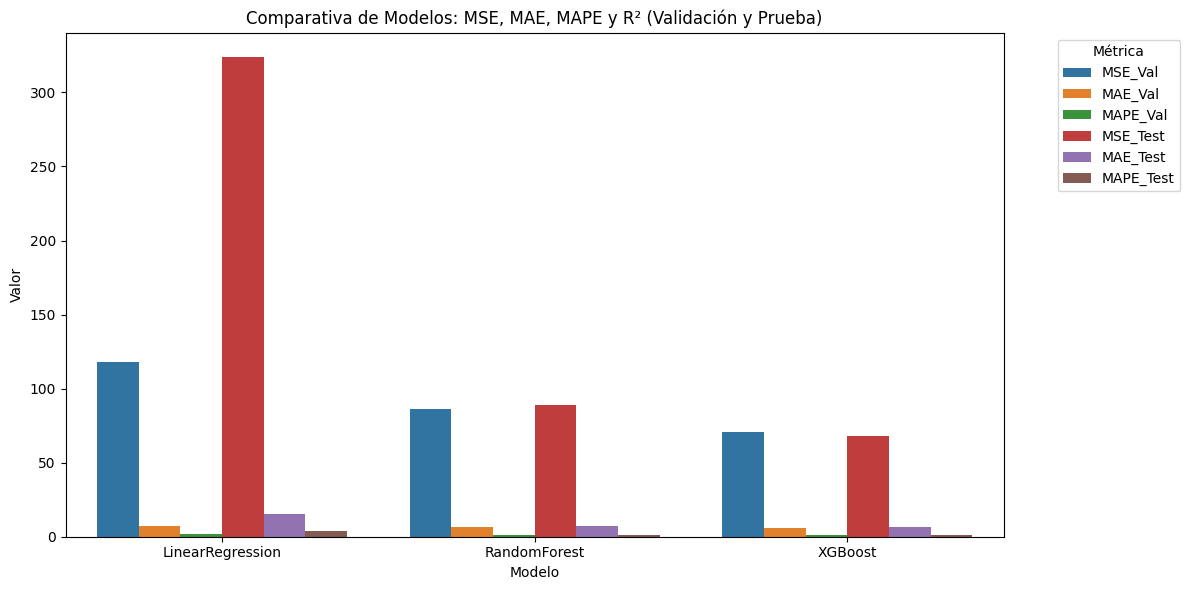


Resultados detallados:
             Modelo     MSE_Val   MAE_Val  MAPE_Val    MSE_Test   MAE_Test  \
0  LinearRegression  117.937066  7.511039  1.641261  324.014961  15.130450   
1      RandomForest   86.072736  6.441121  1.258150   89.002045   7.319552   
2           XGBoost   70.661659  5.757976  1.120558   67.963984   6.251116   

   MAPE_Test  
0   3.625197  
1   1.234356  
2   1.425802  


In [ ]:
df2 = df[df['Valor Mercado (millones de e)'] > 0.5]
df2 = df[df['Valor Mercado (millones de e)'] > 0.5]

# Primero, excluir de df2 los jugadores que están en Jug_shortlist
df2_filtrado = df[~df['Jugador'].isin(Jug_shortlist['Jugador'])]

# Ahora defines X e y sin esos jugadores
X = df2_filtrado[vars_explicativas]
y = df2_filtrado['Valor Mercado (millones de e)']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1111, random_state=42)

X_test_final = Jug_shortlist[vars_explicativas]
y_test_final = Jug_shortlist['Valor Mercado (millones de e)']


# Entrenar y evaluar los modelos
resultados = []

# Regresión lineal
modelo1_3 = LinearRegression()
resultados.append(evaluar_modelo("LinearRegression", modelo1_3, X_train, y_train, X_val, y_val, X_test_final, y_test_final))

# Random Forest
modelo2_3 = RandomForestRegressor(n_estimators=100, random_state=42)
resultados.append(evaluar_modelo("RandomForest", modelo2_3, X_train, y_train, X_val, y_val, X_test_final, y_test_final))


# XGBoost
modelo3_3 = XGBRegressor(learning_rate=0.05,max_depth=3,n_estimators=200,subsample=0.8,random_state=4)
resultados.append(evaluar_modelo("XGBoost", modelo3_3, X_train, y_train, X_val, y_val, X_test_final, y_test_final))


# Crear DataFrame con resultados
resultados_VM = pd.DataFrame(resultados)

# Visualización comparativa
resultados_melted = resultados_VM.melt(id_vars="Modelo", value_vars=["MSE_Val", "MAE_Val", "MAPE_Val", "MSE_Test", "MAE_Test", "MAPE_Test"],
                                       var_name="Métrica", value_name="Valor")

plt.figure(figsize=(12, 6))
sns.barplot(data=resultados_melted, x="Modelo", y="Valor", hue="Métrica")
plt.title("Comparativa de Modelos: MSE, MAE, MAPE y R² (Validación y Prueba)")
plt.xlabel("Modelo")
plt.ylabel("Valor")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Mostrar resultados numéricos
print("\nResultados detallados:")
print(resultados_VM)


In [ ]:
# CatBoost
vars_explicativas = [col for col in df.columns if col not in ['Valor Mercado (millones de e)','Jugador','DesafiosDef', 'Equipo','Gls','Ass','Pases.Peligrosos','G/T','RegatesExt','DisBloq','Pases.Peligrosos','Dentro-Fuera','Intercep','DesafiosExt','Rend_Ofensivo','Rend_Defensivo']]

# Primero, excluir de df2 los jugadores que están en Jug_shortlist
df2_filtrado = df[~df['Jugador'].isin(Jug_shortlist['Jugador'])]

# Ahora defines X e y sin esos jugadores
X = df2_filtrado[vars_explicativas]
y = df2_filtrado['Valor Mercado (millones de e)']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1111, random_state=42)

X_test_final = Jug_shortlist[vars_explicativas]
y_test_final = Jug_shortlist['Valor Mercado (millones de e)']


modelo4_3 = CatBoostRegressor(cat_features=cat_features, learning_rate=0.05,max_depth=3,n_estimators=200,subsample=0.8,random_state=4)
resultados.append(evaluar_modelo("CatBoost", modelo4_3, X_train, y_train, X_val, y_val, X_test_final, y_test_final))

resultados = resultados[-3:]

# Crear DataFrame con resultados
resultados_VM = pd.DataFrame(resultados)

# Visualización comparativa
resultados_melted = resultados_VM.melt(id_vars="Modelo", value_vars=["MSE_Val", "MAE_Val", "MAPE_Val", "MSE_Test", "MAE_Test", "MAPE_Test"],
                                       var_name="Métrica", value_name="Valor")

plt.figure(figsize=(12, 6))
sns.barplot(data=resultados_melted, x="Modelo", y="Valor", hue="Métrica")
plt.title("Comparativa de Modelos: MSE, MAE, MAPE y R² (Validación y Prueba)")
plt.xlabel("Modelo")
plt.ylabel("Valor")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Mostrar resultados numéricos
print("\nResultados detallados:")
print(resultados_VM)

ValueError: 'Equipo' is not in list

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2990
[LightGBM] [Info] Number of data points in the train set: 879, number of used features: 33
[LightGBM] [Info] Start training from score 17.002805
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

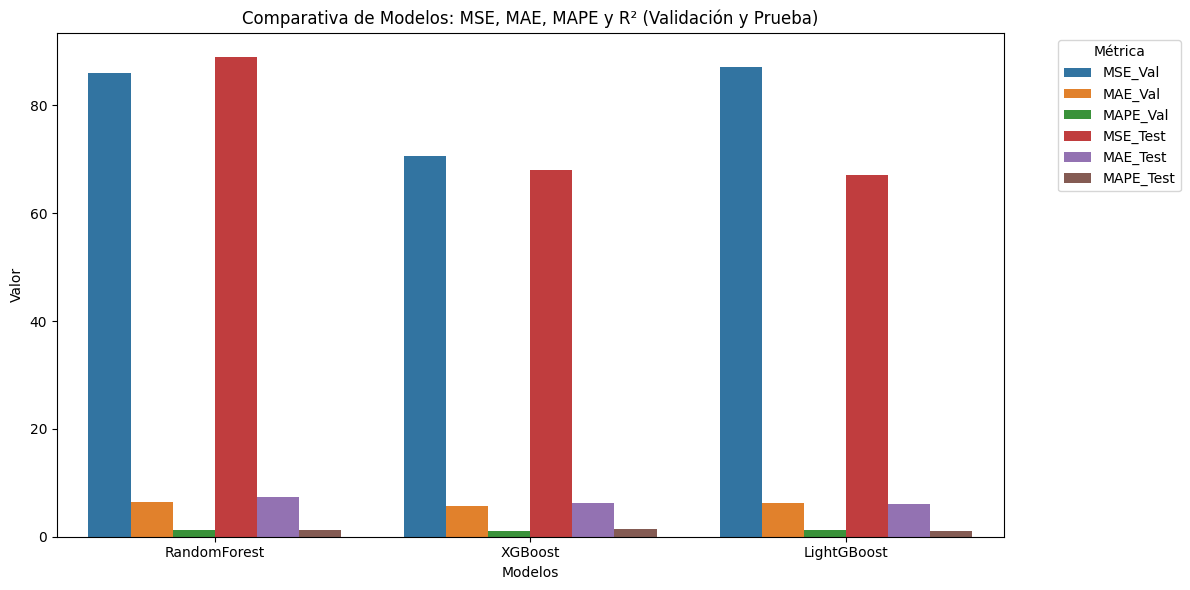


Resultados detallados:
         Modelo    MSE_Val   MAE_Val  MAPE_Val   MSE_Test  MAE_Test  MAPE_Test
0  RandomForest  86.072736  6.441121  1.258150  89.002045  7.319552   1.234356
1       XGBoost  70.661659  5.757976  1.120558  67.963984  6.251116   1.425802
2   LightGBoost  87.178667  6.168454  1.220441  67.040500  6.034174   1.112146


In [ ]:
# LightGBoost
vars_explicativas = variab9

# Primero, excluir de df2 los jugadores que están en Jug_shortlist
df2_filtrado = df[~df['Jugador'].isin(Jug_shortlist['Jugador'])]

# Ahora defines X e y sin esos jugadores
X = df2_filtrado[vars_explicativas]
y = df2_filtrado['Valor Mercado (millones de e)']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1111, random_state=42)

X_test_final = Jug_shortlist[vars_explicativas]
y_test_final = Jug_shortlist['Valor Mercado (millones de e)']


modelo5_3 = LGBMRegressor(learning_rate=0.05,max_depth=3,n_estimators=200,subsample=0.8,random_state=4)
resultados.append(evaluar_modelo("LightGBoost", modelo5_3, X_train, y_train, X_val, y_val, X_test_final, y_test_final))

resultados = resultados[-3:]  # mantiene solo los últimos 3
#resultados_df = pd.DataFrame(resultados)

# Crear DataFrame con resultados
resultados_VM = pd.DataFrame(resultados)

# Visualización comparativa
resultados_melted = resultados_VM.melt(id_vars="Modelo", value_vars=["MSE_Val", "MAE_Val", "MAPE_Val", "MSE_Test", "MAE_Test", "MAPE_Test"],
                                       var_name="Métrica", value_name="Valor")

plt.figure(figsize=(12, 6))
sns.barplot(data=resultados_melted, x="Modelo", y="Valor", hue="Métrica")
plt.title("Comparativa de Modelos: MSE, MAE, MAPE y R² (Validación y Prueba)")
plt.xlabel("Modelos")
plt.ylabel("Valor")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Mostrar resultados numéricos
print("\nResultados detallados:")
print(resultados_VM)



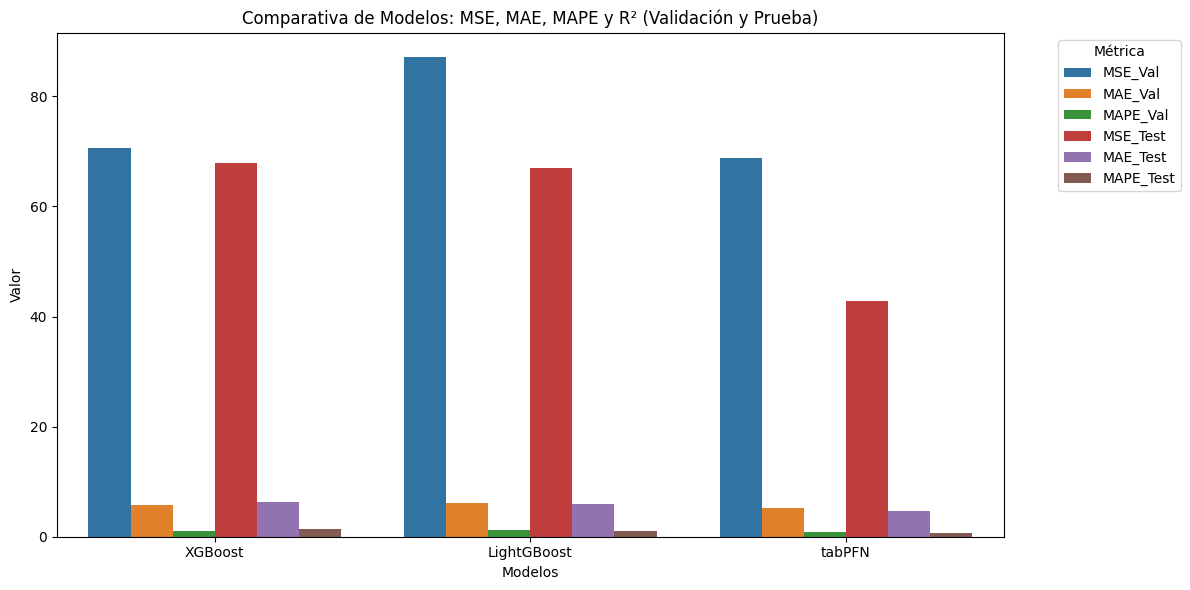


Resultados detallados:
        Modelo    MSE_Val   MAE_Val  MAPE_Val   MSE_Test  MAE_Test  MAPE_Test
0      XGBoost  70.661659  5.757976  1.120558  67.963984  6.251116   1.425802
1  LightGBoost  87.178667  6.168454  1.220441  67.040500  6.034174   1.112146
2       tabPFN  68.710245  5.141854  0.903854  42.884381  4.676216   0.699961


In [ ]:
# tabPFN

modelo6_3 = TabPFNRegressor()
resultados.append(evaluar_modelo("tabPFN", modelo6_3, X_train, y_train, X_val, y_val, X_test_final, y_test_final))

resultados = resultados[-3:]

# Crear DataFrame con resultados
resultados_VM = pd.DataFrame(resultados)

# Visualización comparativa
resultados_melted = resultados_VM.melt(id_vars="Modelo", value_vars=["MSE_Val", "MAE_Val", "MAPE_Val", "MSE_Test", "MAE_Test", "MAPE_Test"],
                                       var_name="Métrica", value_name="Valor")

plt.figure(figsize=(12, 6))
sns.barplot(data=resultados_melted, x="Modelo", y="Valor", hue="Métrica")
plt.title("Comparativa de Modelos: MSE, MAE, MAPE y R² (Validación y Prueba)")
plt.xlabel("Modelos")
plt.ylabel("Valor")
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Mostrar resultados numéricos
print("\nResultados detallados:")
print(resultados_VM)

# A partir de los errores del LightBoost podríamos dudar de haber overfitting

# El MAPE de 69% nos indicaque el modelo no es muy bueno, pero sigue siendo el mejor modelo, con menor MAPE
# Al final concluimos que nuestro mejor modelo predictivo es tabPFN

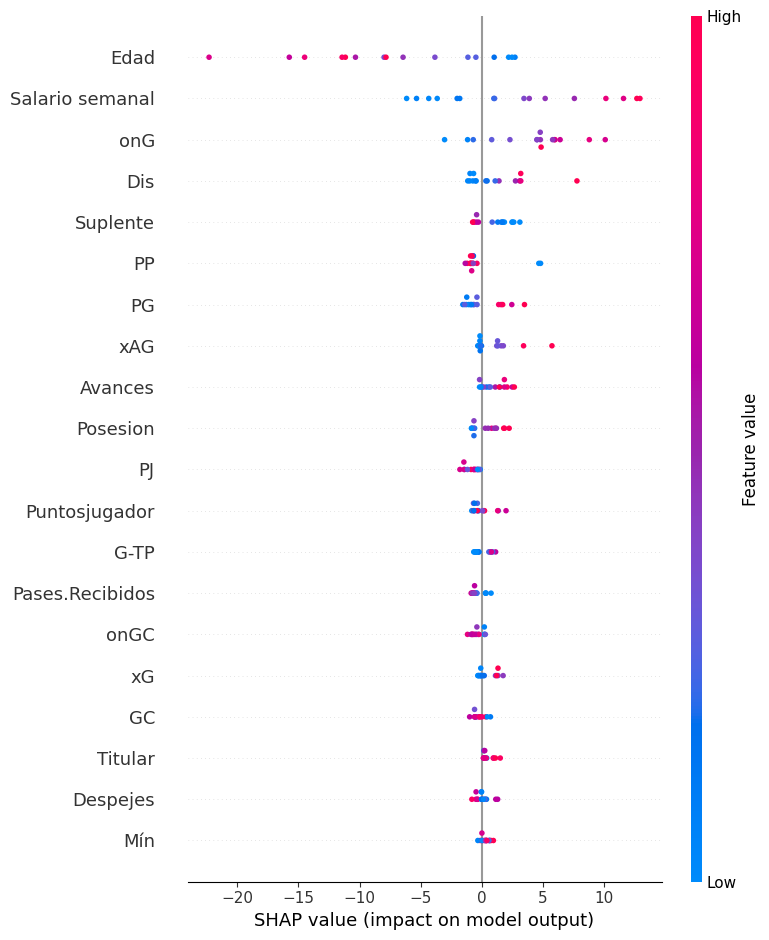

In [ ]:
# Interpretabilidad del XGBoost. Ya que con TabPFN no puedo usar SHAP
# Usado el segundo mejor modelo

# Crear TreeExplainer para XGBoost
explainer = shap.Explainer(modelo3_3, X_train)

# Calcular valores SHAP para el conjunto de prueba
shap_values = explainer(X_test_final)

# Visualizar resumen de importancia de variables
shap.summary_plot(shap_values, X_test_final, feature_names=vars_explicativas, show=False)
plt.show()

In [ ]:
# Predecir el valor de mercado de los jugadores de la shortlist con XGBOOST

y_pred_test1 = modelo3_3.predict(Jug_shortlist[vars_explicativas])

Jug_shortlist['Valor_Predicho'] = y_pred_test1

/tmp/ipython-input-80-2566474009.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jug_shortlist['Valor_Predicho'] = y_pred_test1


In [ ]:
# Predecir el valor de mercado de los jugadores de la shortlist con TabPFN

y_pred2 = modelo6_3.predict(X_test_final)
y_pred2

jugadores_test = df.loc[X_test_final.index, 'Jugador']

tabla_resultados2 = pd.DataFrame({
    'Jugador': df.loc[X_test_final.index, 'Jugador'].values,
    'Valor_Predicho_TabPFN': y_pred2,
    'Valor_Predicho_XGB': y_pred_test1,
    'Valor': df.loc[X_test_final.index, 'Valor Mercado (millones de e)'].values
})

top_20_2 = tabla_resultados2.sort_values(by='Valor', ascending=False).head(20)
top_20_2

,Jugador,Valor_Predicho_TabPFN,Valor_Predicho_XGB,Valor
12,Son Heung-min,40.613987,44.209679,45.0
15,Oleksandr Zinchenko,40.862572,41.164631,38.0
6,Antonee Robinson,24.407379,27.788132,30.0
13,Virgil van Dijk,35.441734,24.471844,30.0
4,Alex Iwobi,22.935040,21.657509,25.0
11,James Tarkowski,16.140678,21.637905,18.0
7,Lucas Ocampos,10.631591,13.137627,12.0
8,Emerson Palmieri,20.940853,27.313616,12.0
5,Mario Hermoso,30.046581,26.352821,10.0
3,Sergi Cardona,6.749488,9.068920,5.0


Elegimos los jugadores fijandonos en un valor de mercado mayor en el futuro y  usando las variables más importantes obtenidas por el SHAP

GRACIAS